# IMPORTS

In [3]:
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.core.converters import load_any_file
from weka.core.converters import save_any_file
import weka.core.converters as converters
from weka.filters import Filter
import pandas as pd
from weka.core.dataset import Instances

import warnings
warnings.filterwarnings("ignore")

jvm.start(system_cp=True, packages=True)

ModuleNotFoundError: No module named 'weka'

# Dataset For Models 1 and 2

## Data Preparation

Load the data with the ArffLoader module.

In [5]:
loader = Loader(classname="weka.core.converters.ArffLoader")
data_modelos_1_2_arff = loader.load_file('./BBDDs_and_Models/BBDD_1_2.arff')
data_modelos_1_2_arff.class_is_last()

@relation 'FJRP-weka.filters.unsupervised.attribute.Add-TNOM-N12months_History_Injury_SoftTissue_>8days_FAR-LSoft-tissue,No-C232-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-N12months_History_Injury_SoftTissue_>AnyTimeLoss_FAR-LSoft-tissue,No-C231-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_FPPA_D_discr-L0,1,2,3-C212-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_FPPA_ND_discr-L0,1,2,3-C214-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_KneeMedialDisplacement_D_discr-LVaro,Valgus-C220-W1.0-weka.filters.unsupervised.attribute.Remove-R220-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_KneeMedialDisplacement_D_discr-L0,1,2,3-C220-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_KneeMedialDisplacement_ND_discr-L0,1,2,3-C222-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_Knee-to-ankle-ratio_discr-LVaro,Valgus-C219-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NSLCMJ-Height_ND_discr-L-9.88,+9.88-C1

Realizamos una funcion para transformar el fichero arff en csv y poder cargarlo en un dataframe, poder analizarlo con ScikitLearn, y mostrar de manera grafica los datos con matplotlib y seaborn.

In [6]:
def arff2csv(arff_path, csv_path=None):
    with open(arff_path, 'r') as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w') as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split(' ')[1])  # @attribute attribute_tag numeric

        print("Convert {} to {}.".format(arff_path, csv_path))

In [7]:
input_file = "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelos 1 y 2.arff"
output_file = None
arff2csv(input_file,output_file)

Convert /home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelos 1 y 2.arff to /home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelos 1 y 2.csv.


In [8]:
filepath = "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/Base de datos modelos 1 y 2.csv"
index = None
target = "Soft-Tissue_injury_≥4days"


data_modelos_1_2_csv = pd.read_csv(filepath, index_col=index)
data_modelos_1_2_csv[target] = data_modelos_1_2_csv[target].astype("category")

data_modelos_1_2_csv

,BMI,ROM-PADF-KE_D,Asym-ROM-PHIR(≥8)_discr,Asym_SLCMJLanding-pVGRF(10percent)_discr,Asym_TJ_Valgus_FPPA(10percent)_discr,DVJ_Valgus_KneeMedialDisplacement_D_discr,Soft-Tissue_injury_≥4days
0,18.716444,33,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
1,22.182267,41,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
2,25.352783,35,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No
3,21.332873,33,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
4,23.085619,25,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,Yes
...,...,...,...,...,...,...,...
255,26.841821,34,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,Bilateral_Asymmetry,0,No
256,22.079395,33,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,Yes
257,22.944419,28,No_Bilateral_Asymmetry,Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
258,22.566588,32,No_Bilateral_Asymmetry,Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No


Tras comprobar que se ha transformado correctamente el fichero, empezamos con la visualización de los datos y las relaciones entre ellos.

## Visualización de los Datos

In [9]:
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

import numpy as np

from sklearn.preprocessing import LabelEncoder

In [10]:
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

sns.set_palette("vlag")

In [11]:
data_modelos_1_2_csv.sample(5)

,BMI,ROM-PADF-KE_D,Asym-ROM-PHIR(≥8)_discr,Asym_SLCMJLanding-pVGRF(10percent)_discr,Asym_TJ_Valgus_FPPA(10percent)_discr,DVJ_Valgus_KneeMedialDisplacement_D_discr,Soft-Tissue_injury_≥4days
36,16.686682,26,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No
210,18.870663,28,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No
238,22.667964,36,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No
70,15.788781,22,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No
213,18.093983,26,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,2,No


In [12]:
data_modelos_1_2_csv.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   BMI                                        260 non-null    float64 
 1   ROM-PADF-KE_D                              260 non-null    int64   
 2   Asym-ROM-PHIR(≥8)_discr                    260 non-null    object  
 3   Asym_SLCMJLanding-pVGRF(10percent)_discr   260 non-null    object  
 4   Asym_TJ_Valgus_FPPA(10percent)_discr       260 non-null    object  
 5   DVJ_Valgus_KneeMedialDisplacement_D_discr  260 non-null    int64   
 6   Soft-Tissue_injury_≥4days                  260 non-null    category
dtypes: category(1), float64(1), int64(2), object(3)

In [13]:
data_modelos_1_2_csv["DVJ_Valgus_KneeMedialDisplacement_D_discr"] = data_modelos_1_2_csv["DVJ_Valgus_KneeMedialDisplacement_D_discr"].apply(str)

In [14]:
data_modelos_1_2_csv.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   BMI                                        260 non-null    float64 
 1   ROM-PADF-KE_D                              260 non-null    int64   
 2   Asym-ROM-PHIR(≥8)_discr                    260 non-null    object  
 3   Asym_SLCMJLanding-pVGRF(10percent)_discr   260 non-null    object  
 4   Asym_TJ_Valgus_FPPA(10percent)_discr       260 non-null    object  
 5   DVJ_Valgus_KneeMedialDisplacement_D_discr  260 non-null    object  
 6   Soft-Tissue_injury_≥4days                  260 non-null    category
dtypes: category(1), float64(1), int64(1), object(4)

In [15]:
data_modelos_1_2_csv.shape

(260, 7)

Tas observar que los datos han sido correctamente cargados, comprobamos la existencia de valores nulos.

In [16]:
data_modelos_1_2_csv.isna().sum().sort_values()

BMI                                          0
ROM-PADF-KE_D                                0
Asym-ROM-PHIR(≥8)_discr                      0
Asym_SLCMJLanding-pVGRF(10percent)_discr     0
Asym_TJ_Valgus_FPPA(10percent)_discr         0
DVJ_Valgus_KneeMedialDisplacement_D_discr    0
Soft-Tissue_injury_≥4days                    0
dtype: int64

In [17]:
data_modelos_1_2_csv.select_dtypes(include = ['category']).describe()

,Soft-Tissue_injury_≥4days
count,260
unique,2
top,No
freq,215


Vemos que no hay valores nulos y comprobamos que la base de datos esta completamente desbalanceada, teniendo un 82% de "No" contra un 18% de "Yes"

### Variable Clase

Text(0.5, 0.98, 'Distribución Variable Clase')

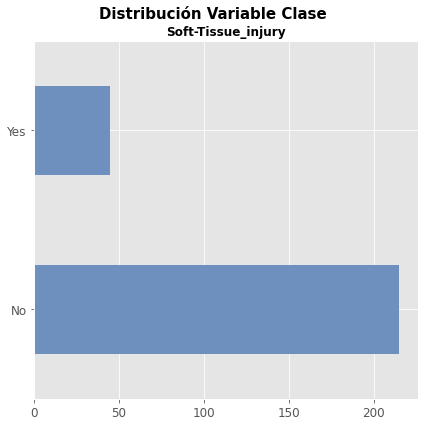

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
ax = ax

data_modelos_1_2_csv["Soft-Tissue_injury_≥4days"].value_counts().plot.barh(ax = ax)
ax.set_title('Soft-Tissue_injury', fontsize = 12, fontweight = "bold")
ax.tick_params(labelsize = 12)
ax.set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución Variable Clase', fontsize = 15, fontweight = "bold")

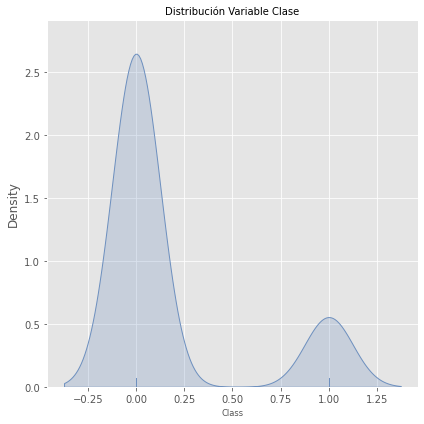

In [19]:
label_encoder = LabelEncoder()
data_modelos_1_2_csv_class_encoded = label_encoder.fit_transform(data_modelos_1_2_csv["Soft-Tissue_injury_≥4days"])

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
sns.distplot(
    data_modelos_1_2_csv_class_encoded,
    hist = False,
    rug = True,
    kde_kws = {'shade': True, 'linewidth':1},
    ax = axes)

axes.set_title('Distribución Variable Clase', fontsize = 'medium')
axes.set_xlabel("Class", fontsize = 'small')
axes.tick_params(labelsize = 10)

fig.tight_layout()

Exactamente como hemos dicho antes podemos ver que la clase esta desbalanceada con una gran diferencia en el número de "No", frente al número de "Yes".

### Variables Numericas

In [20]:
data_modelos_1_2_csv.select_dtypes(include = ['float64', 'int']).describe()

,BMI,ROM-PADF-KE_D
count,260.000000,260.000000
mean,19.934551,30.307692
std,2.625108,4.516544
min,13.639753,20.000000
25%,18.252914,28.000000
50%,19.937457,30.000000
75%,21.647451,33.000000
max,27.268714,48.000000


In [21]:
nums = data_modelos_1_2_csv.select_dtypes(include = ['float64', 'int']).columns

for colum in nums:
    if len(data_modelos_1_2_csv[colum].unique()) < 5:
        data_modelos_1_2_csv[colum] = data_modelos_1_2_csv[colum].apply(str)
        print(colum, "ha sido transformada a categorica por el bajo numero de valores")

Text(0.5, 0.98, 'Distribución Variables Numéricas')

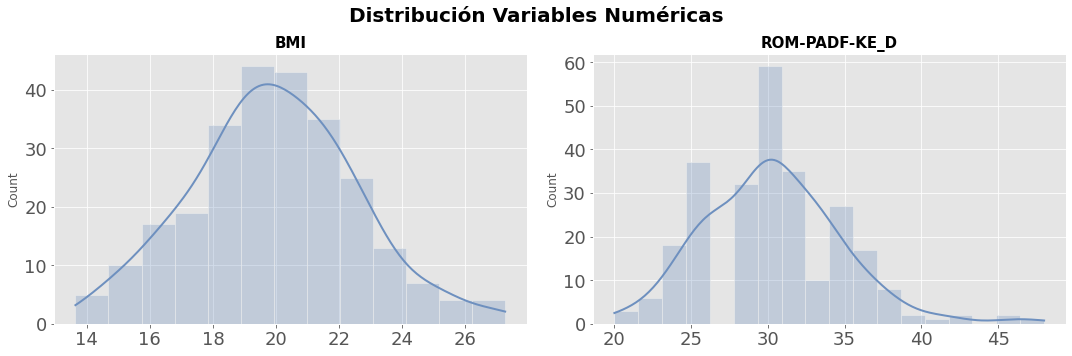

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axes = axes.flat
columnas_numeric = data_modelos_1_2_csv.select_dtypes(include = ['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = data_modelos_1_2_csv,
        x = colum,
        stat = "count",
        kde = True,
        line_kws = {'linewidth': 2},
        alpha = 0.3,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Distribución Variables Numéricas', fontsize = 20, fontweight = "bold")

Respecto a las variables numéricas vemos que tienen una distribucion continua donde los picos estan en los valores intermedios.

In [23]:
corr_matrix = data_modelos_1_2_csv[columnas_numeric].corr()
corr_matrix

,BMI,ROM-PADF-KE_D
BMI,1.000000,0.175249
ROM-PADF-KE_D,0.175249,1.000000


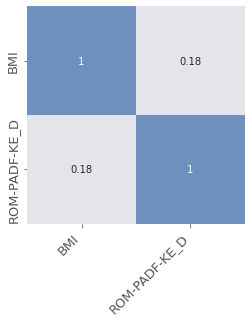

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))

sns.heatmap(
    corr_matrix,
    annot = True,
    cbar = False,
    annot_kws = {"size": 10},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sns.color_palette("vlag_r"),
    square = True,
    ax = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right')

ax.tick_params(labelsize = 13)

### Variables Categoricas

In [25]:
data_modelos_1_2_csv.select_dtypes(include=['object']).describe()

,Asym-ROM-PHIR(≥8)_discr,Asym_SLCMJLanding-pVGRF(10percent)_discr,Asym_TJ_Valgus_FPPA(10percent)_discr,DVJ_Valgus_KneeMedialDisplacement_D_discr
count,260,260,260,260
unique,2,2,2,4
top,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1
freq,247,165,249,130


Como podemos observar en las variables categóricas también hay un claro desbalanceo.

Text(0.5, 0.98, 'Distribución Variables Categóricas')

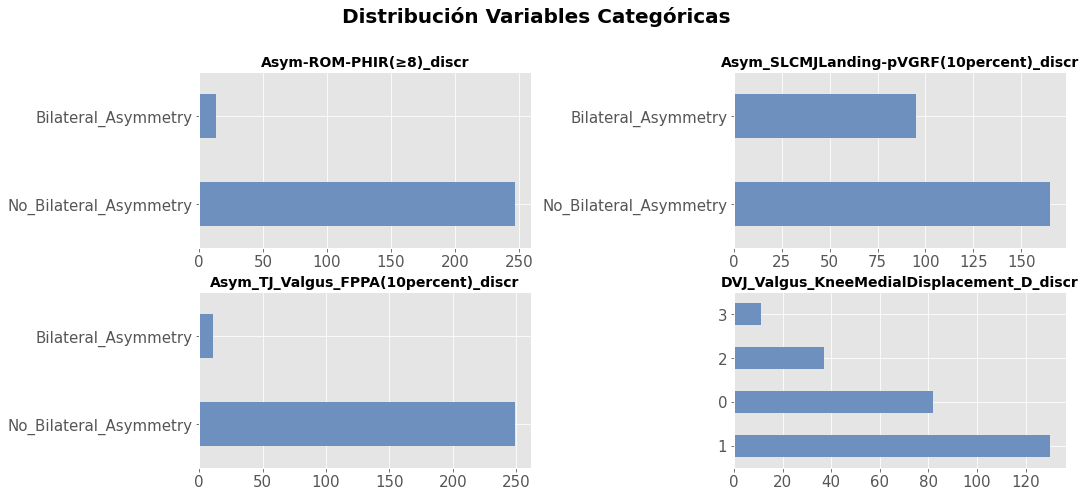

In [26]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 7))
axes = axes.flat
columnas_object = data_modelos_1_2_csv.select_dtypes(include = ['object']).columns

for i, colum in enumerate(columnas_object):
        data_modelos_1_2_csv[colum].value_counts().plot.barh(ax = axes[i])
        axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
        axes[i].tick_params(labelsize = 15)
        axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Distribución Variables Categóricas', fontsize = 20, fontweight = "bold")

Respecto a las variables categoricas vemos que tambien hay un desbalanceo hacia la "No_Bilateral_Asymmetry"

## VISUALIZACION DE LAS RELACIONES ENTRE LOS DATOS

In [27]:
filter1_Soft_Tissue_injury = data_modelos_1_2_csv["Soft-Tissue_injury_≥4days"].isin(["No"])
filter2_Soft_Tissue_injury = data_modelos_1_2_csv["Soft-Tissue_injury_≥4days"].isin(["Yes"])

No_injury = data_modelos_1_2_csv[filter1_Soft_Tissue_injury]
Yes_injury = data_modelos_1_2_csv[filter2_Soft_Tissue_injury]

In [28]:
def funcion_No_injury(a, colum):
    x = []
    for i in a:
        x.append(No_injury[colum].value_counts()[i])
    return x

def funcion_Yes_injury(a, colum):
    x = []
    for i in a:
        x.append(Yes_injury[colum].value_counts()[i])
    return x

### Relación entre Variables Categóricas y la Clase

Text(0.5, 0.98, 'Distribución Variables Categóricas con respecto la clase')

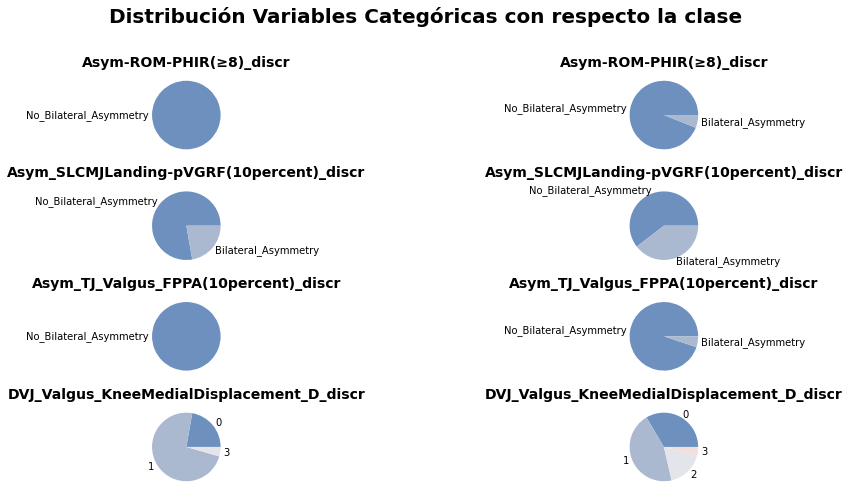

In [29]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 7))
axes = axes.flat


columnas_object = data_modelos_1_2_csv.select_dtypes(include = ['object']).columns

for i, colum in enumerate(columnas_object):
    
    yes = funcion_Yes_injury(Yes_injury[colum].unique(), colum)
    no = funcion_No_injury(No_injury[colum].unique(), colum)  
    
    axes[i*2].pie(yes, labels = Yes_injury[colum].unique())
    axes[i*2].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i*2].tick_params(labelsize = 15)
    axes[i*2].set_xlabel("")
            
    axes[(i*2)+1].pie(no, labels = No_injury[colum].unique())
    axes[(i*2)+1].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[(i*2)+1].tick_params(labelsize = 15)
    axes[(i*2)+1].set_xlabel("")    
    
    


fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Distribución Variables Categóricas con respecto la clase', fontsize = 20, fontweight = "bold")

### Relación entre Variables Numéricas y la Clase

Text(0.5, 0.98, 'Distribución Variables Numéricas con respecto la clase')

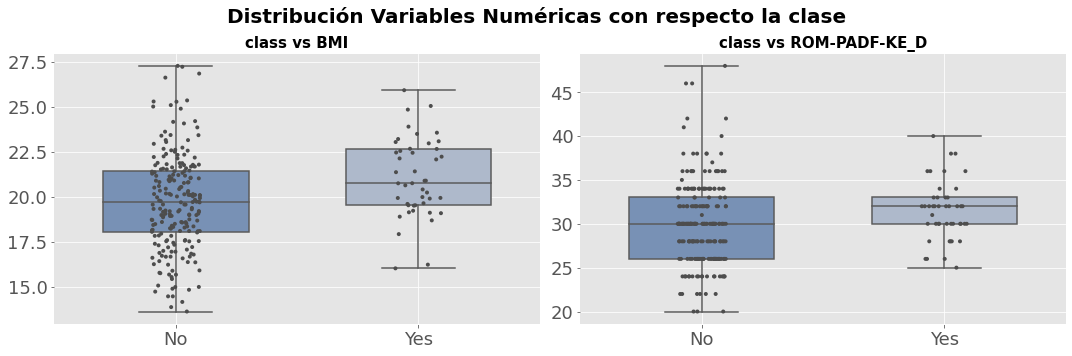

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axes = axes.flat
columnas_numeric = data_modelos_1_2_csv.select_dtypes(include = ['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.boxplot(x="Soft-Tissue_injury_≥4days", y=colum,data = data_modelos_1_2_csv,
                whis=[0, 100], width=.6, ax = axes[i])

    sns.stripplot(x="Soft-Tissue_injury_≥4days", y=colum,data = data_modelos_1_2_csv,
                  size=4, color=".3", linewidth=0, ax = axes[i])
    
    axes[i].set_title(f"class vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].yaxis.grid(True)
    axes[i].xaxis.grid(True)
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
sns.despine(trim=True, left=True)

fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Distribución Variables Numéricas con respecto la clase', fontsize = 20, fontweight = "bold")

### Preprocesamiento

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
data_modelos_1_2_csv = data_modelos_1_2_csv.replace({'?': '-1'})
X = data_modelos_1_2_csv.drop('Soft-Tissue_injury_≥4days', axis = 'columns')
y = data_modelos_1_2_csv['Soft-Tissue_injury_≥4days']

### Binarización de las variables cualitativas

In [33]:
cat_cols = X.select_dtypes(include=['object', 'category'])
numeric_cols = X.select_dtypes(include=['float64', 'int'])

In [34]:
cat_cols

,Asym-ROM-PHIR(≥8)_discr,Asym_SLCMJLanding-pVGRF(10percent)_discr,Asym_TJ_Valgus_FPPA(10percent)_discr,DVJ_Valgus_KneeMedialDisplacement_D_discr
0,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0
1,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0
2,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1
3,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0
4,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0
...,...,...,...,...
255,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,Bilateral_Asymmetry,0
256,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1
257,No_Bilateral_Asymmetry,Bilateral_Asymmetry,No_Bilateral_Asymmetry,0
258,No_Bilateral_Asymmetry,Bilateral_Asymmetry,No_Bilateral_Asymmetry,1


In [35]:
encoder = OneHotEncoder(categories = 'auto', drop = 'first', handle_unknown = 'ignore')
cat_cols_encoded_DF = pd.DataFrame(encoder.fit_transform(cat_cols).toarray(), columns = encoder.get_feature_names_out())
cat_cols_encoded_DF

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3
0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
255,1.0,1.0,0.0,0.0,0.0,0.0
256,1.0,1.0,1.0,1.0,0.0,0.0
257,1.0,0.0,1.0,0.0,0.0,0.0
258,1.0,0.0,1.0,1.0,0.0,0.0


In [36]:
X_numeric = pd.concat([cat_cols_encoded_DF, numeric_cols], axis = 1)
X_numeric

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D
0,1.0,1.0,1.0,0.0,0.0,0.0,18.716444,33
1,1.0,1.0,1.0,0.0,0.0,0.0,22.182267,41
2,1.0,1.0,1.0,1.0,0.0,0.0,25.352783,35
3,1.0,1.0,1.0,0.0,0.0,0.0,21.332873,33
4,1.0,1.0,1.0,0.0,0.0,0.0,23.085619,25
...,...,...,...,...,...,...,...,...
255,1.0,1.0,0.0,0.0,0.0,0.0,26.841821,34
256,1.0,1.0,1.0,1.0,0.0,0.0,22.079395,33
257,1.0,0.0,1.0,0.0,0.0,0.0,22.944419,28
258,1.0,0.0,1.0,1.0,0.0,0.0,22.566588,32


In [37]:
le = LabelEncoder()
y_binary = le.fit_transform(y)
y_binary = pd.DataFrame(y_binary, columns = [y.name])
y_binary

,Soft-Tissue_injury_≥4days
0,0
1,0
2,0
3,0
4,1
...,...
255,0
256,1
257,0
258,0


In [38]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        X_numeric,
                                        y_binary,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = y_binary
                                    )


### Estandarización y escalado de variables numéricas

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
X_train[:] = scaler.fit_transform(X_train)
X_train

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D
127,1.0,1.0,0.0,1.0,0.0,0.0,0.854089,0.285714
219,1.0,1.0,1.0,1.0,0.0,0.0,0.507082,0.428571
121,1.0,1.0,1.0,1.0,0.0,0.0,0.403960,0.214286
204,1.0,1.0,1.0,0.0,1.0,0.0,0.149943,0.571429
100,1.0,1.0,1.0,1.0,0.0,0.0,0.394866,0.500000
...,...,...,...,...,...,...,...,...
252,1.0,1.0,1.0,1.0,0.0,0.0,0.662717,0.464286
89,1.0,0.0,1.0,0.0,0.0,1.0,0.413098,0.357143
31,1.0,0.0,1.0,0.0,0.0,0.0,0.357405,0.357143
224,1.0,1.0,1.0,1.0,0.0,0.0,0.702233,0.357143


In [41]:
X_test[:] = scaler.transform(X_test)
X_test

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D
202,1.0,1.0,1.0,0.0,0.0,0.0,0.571024,0.357143
185,1.0,1.0,1.0,0.0,1.0,0.0,0.247037,0.357143
247,1.0,1.0,1.0,1.0,0.0,0.0,0.589594,0.500000
255,1.0,1.0,0.0,0.0,0.0,0.0,0.968678,0.500000
138,1.0,0.0,1.0,1.0,0.0,0.0,0.407235,0.428571
...,...,...,...,...,...,...,...,...
94,1.0,1.0,1.0,1.0,0.0,0.0,0.765725,0.071429
256,1.0,1.0,1.0,1.0,0.0,0.0,0.619243,0.464286
220,1.0,0.0,1.0,0.0,0.0,0.0,0.490489,0.357143
36,1.0,1.0,1.0,1.0,0.0,0.0,0.223563,0.214286


### Imputación de valores ausentes

In [42]:
X_train.isna().sum().sort_values()

Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                     0
Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry    0
Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry        0
DVJ_Valgus_KneeMedialDisplacement_D_discr_1                        0
DVJ_Valgus_KneeMedialDisplacement_D_discr_2                        0
DVJ_Valgus_KneeMedialDisplacement_D_discr_3                        0
BMI                                                                0
ROM-PADF-KE_D                                                      0
dtype: int64

In [43]:
X_test.isna().sum().sort_values()

Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                     0
Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry    0
Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry        0
DVJ_Valgus_KneeMedialDisplacement_D_discr_1                        0
DVJ_Valgus_KneeMedialDisplacement_D_discr_2                        0
DVJ_Valgus_KneeMedialDisplacement_D_discr_3                        0
BMI                                                                0
ROM-PADF-KE_D                                                      0
dtype: int64

In [44]:
y_train.isna().sum().sort_values()

Soft-Tissue_injury_≥4days    0
dtype: int64

In [45]:
y_test.isna().sum().sort_values()

Soft-Tissue_injury_≥4days    0
dtype: int64

### Exclusión de variables con varianza próxima a cero

In [46]:
from sklearn.feature_selection import VarianceThreshold

In [47]:
selector = VarianceThreshold(threshold=0.0)
selector.fit_transform(X_train)
X_train = X_train[X_train.columns[selector.get_support(indices = True)]]
X_train

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D
127,1.0,1.0,0.0,1.0,0.0,0.0,0.854089,0.285714
219,1.0,1.0,1.0,1.0,0.0,0.0,0.507082,0.428571
121,1.0,1.0,1.0,1.0,0.0,0.0,0.403960,0.214286
204,1.0,1.0,1.0,0.0,1.0,0.0,0.149943,0.571429
100,1.0,1.0,1.0,1.0,0.0,0.0,0.394866,0.500000
...,...,...,...,...,...,...,...,...
252,1.0,1.0,1.0,1.0,0.0,0.0,0.662717,0.464286
89,1.0,0.0,1.0,0.0,0.0,1.0,0.413098,0.357143
31,1.0,0.0,1.0,0.0,0.0,0.0,0.357405,0.357143
224,1.0,1.0,1.0,1.0,0.0,0.0,0.702233,0.357143


In [48]:
selector.transform(X_test)
X_test = X_test[X_test.columns[selector.get_support(indices = True)]]
X_test

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D
202,1.0,1.0,1.0,0.0,0.0,0.0,0.571024,0.357143
185,1.0,1.0,1.0,0.0,1.0,0.0,0.247037,0.357143
247,1.0,1.0,1.0,1.0,0.0,0.0,0.589594,0.500000
255,1.0,1.0,0.0,0.0,0.0,0.0,0.968678,0.500000
138,1.0,0.0,1.0,1.0,0.0,0.0,0.407235,0.428571
...,...,...,...,...,...,...,...,...
94,1.0,1.0,1.0,1.0,0.0,0.0,0.765725,0.071429
256,1.0,1.0,1.0,1.0,0.0,0.0,0.619243,0.464286
220,1.0,0.0,1.0,0.0,0.0,0.0,0.490489,0.357143
36,1.0,1.0,1.0,1.0,0.0,0.0,0.223563,0.214286


In [49]:
Data_train = pd.concat([X_train, y_train], axis = 1)
Data_train[target] = Data_train[target].astype("category")
Data_test = pd.concat([X_test, y_test], axis = 1)
Data_test[target] = Data_test[target].astype("category")

In [50]:
Data_train.to_csv(r'/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelos_1_2_csv_encoded_train.csv', index = False)
Data_test.to_csv(r'/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelos_1_2_csv_encoded_test.csv', index = False)

In [51]:
data_modelos_1_2_arff

@relation 'FJRP-weka.filters.unsupervised.attribute.Add-TNOM-N12months_History_Injury_SoftTissue_>8days_FAR-LSoft-tissue,No-C232-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-N12months_History_Injury_SoftTissue_>AnyTimeLoss_FAR-LSoft-tissue,No-C231-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_FPPA_D_discr-L0,1,2,3-C212-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_FPPA_ND_discr-L0,1,2,3-C214-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_KneeMedialDisplacement_D_discr-LVaro,Valgus-C220-W1.0-weka.filters.unsupervised.attribute.Remove-R220-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_KneeMedialDisplacement_D_discr-L0,1,2,3-C220-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_KneeMedialDisplacement_ND_discr-L0,1,2,3-C222-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NDVJ_Valgus_Knee-to-ankle-ratio_discr-LVaro,Valgus-C219-W1.0-weka.filters.unsupervised.attribute.Add-TNOM-NSLCMJ-Height_ND_discr-L-9.88,+9.88-C1

In [52]:
data_modelos_1_2_csv

,BMI,ROM-PADF-KE_D,Asym-ROM-PHIR(≥8)_discr,Asym_SLCMJLanding-pVGRF(10percent)_discr,Asym_TJ_Valgus_FPPA(10percent)_discr,DVJ_Valgus_KneeMedialDisplacement_D_discr,Soft-Tissue_injury_≥4days
0,18.716444,33,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
1,22.182267,41,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
2,25.352783,35,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No
3,21.332873,33,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
4,23.085619,25,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,Yes
...,...,...,...,...,...,...,...
255,26.841821,34,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,Bilateral_Asymmetry,0,No
256,22.079395,33,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,Yes
257,22.944419,28,No_Bilateral_Asymmetry,Bilateral_Asymmetry,No_Bilateral_Asymmetry,0,No
258,22.566588,32,No_Bilateral_Asymmetry,Bilateral_Asymmetry,No_Bilateral_Asymmetry,1,No


In [53]:
Data_train

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D,Soft-Tissue_injury_≥4days
127,1.0,1.0,0.0,1.0,0.0,0.0,0.854089,0.285714,0
219,1.0,1.0,1.0,1.0,0.0,0.0,0.507082,0.428571,0
121,1.0,1.0,1.0,1.0,0.0,0.0,0.403960,0.214286,1
204,1.0,1.0,1.0,0.0,1.0,0.0,0.149943,0.571429,0
100,1.0,1.0,1.0,1.0,0.0,0.0,0.394866,0.500000,0
...,...,...,...,...,...,...,...,...,...
252,1.0,1.0,1.0,1.0,0.0,0.0,0.662717,0.464286,1
89,1.0,0.0,1.0,0.0,0.0,1.0,0.413098,0.357143,0
31,1.0,0.0,1.0,0.0,0.0,0.0,0.357405,0.357143,0
224,1.0,1.0,1.0,1.0,0.0,0.0,0.702233,0.357143,1


In [54]:
Data_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 127 to 194
Data columns (total 9 columns):
 #   Column                                                           Non-Null Count  Dtype   
---  ------                                                           --------------  -----   
 0   Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                   182 non-null    float64 
 1   Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry  182 non-null    float64 
 2   Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry      182 non-null    float64 
 3   DVJ_Valgus_KneeMedialDisplacement_D_discr_1                      182 non-null    float64 
 4   DVJ_Valgus_KneeMedialDisplacement_D_discr_2                      182 non-null    float64 
 5   DVJ_Valgus_KneeMedialDisplacement_D_discr_3                      182 non-null    float64 
 6   BMI                                                              182 non-null    float64 
 7   ROM-PADF-KE_D                     

In [55]:
Data_test

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D,Soft-Tissue_injury_≥4days
202,1.0,1.0,1.0,0.0,0.0,0.0,0.571024,0.357143,0
185,1.0,1.0,1.0,0.0,1.0,0.0,0.247037,0.357143,0
247,1.0,1.0,1.0,1.0,0.0,0.0,0.589594,0.500000,0
255,1.0,1.0,0.0,0.0,0.0,0.0,0.968678,0.500000,0
138,1.0,0.0,1.0,1.0,0.0,0.0,0.407235,0.428571,0
...,...,...,...,...,...,...,...,...,...
94,1.0,1.0,1.0,1.0,0.0,0.0,0.765725,0.071429,0
256,1.0,1.0,1.0,1.0,0.0,0.0,0.619243,0.464286,1
220,1.0,0.0,1.0,0.0,0.0,0.0,0.490489,0.357143,0
36,1.0,1.0,1.0,1.0,0.0,0.0,0.223563,0.214286,0


In [56]:
Data_test.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 202 to 99
Data columns (total 9 columns):
 #   Column                                                           Non-Null Count  Dtype   
---  ------                                                           --------------  -----   
 0   Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                   78 non-null     float64 
 1   Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry  78 non-null     float64 
 2   Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry      78 non-null     float64 
 3   DVJ_Valgus_KneeMedialDisplacement_D_discr_1                      78 non-null     float64 
 4   DVJ_Valgus_KneeMedialDisplacement_D_discr_2                      78 non-null     float64 
 5   DVJ_Valgus_KneeMedialDisplacement_D_discr_3                      78 non-null     float64 
 6   BMI                                                              78 non-null     float64 
 7   ROM-PADF-KE_D                       

In [54]:
data_modelos_1_2_arff_encoded_train = converters.load_any_file('/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelos_1_2_csv_encoded_train.csv')
data_modelos_1_2_arff_encoded_train.class_is_last()

f = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "9"])
f.inputformat(data_modelos_1_2_arff_encoded_train)
data_modelos_1_2_arff_encoded_train = f.filter(data_modelos_1_2_arff_encoded_train)

save_any_file(data_modelos_1_2_arff_encoded_train, "/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelos_1_2_arff_train.arff")
data_modelos_1_2_arff_encoded_train

@relation data_modelos_1_2_csv_encoded_train-weka.filters.unsupervised.attribute.NumericToNominal-R9

@attribute Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_1 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_2 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_3 numeric
@attribute BMI numeric
@attribute ROM-PADF-KE_D numeric
@attribute Soft-Tissue_injury_≥4days {0,1}

@data
1,1,0,1,0,0,0.854089,0.285714,0
1,1,1,1,0,0,0.507082,0.428571,0
1,1,1,1,0,0,0.40396,0.214286,1
1,1,1,0,1,0,0.149943,0.571429,0
1,1,1,1,0,0,0.394866,0.5,0
1,0,1,1,0,0,0.271864,0.214286,0
1,1,1,1,0,0,0.468384,0.285714,0
1,0,1,1,0,0,0.555451,0.214286,0
1,1,1,0,1,0,0.231874,0.142857,0
1,0,1,0,0,1,0.550233,0.464286,0
1,1,1,1,0,0,0.285718,0.285714,0
1,1,1,0,0,0,0.308148,0.357143

In [55]:
data_modelos_1_2_arff_encoded_test = converters.load_any_file('/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelos_1_2_csv_encoded_test.csv')
data_modelos_1_2_arff_encoded_test.class_is_last()

f = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "9"])
f.inputformat(data_modelos_1_2_arff_encoded_test)
data_modelos_1_2_arff_encoded_test = f.filter(data_modelos_1_2_arff_encoded_test)

save_any_file(data_modelos_1_2_arff_encoded_test, '/home/pablo/Escritorio/TFG/Bases de Datos, Modelos y Esquemas/data_modelos_1_2_arff_test.arff')
data_modelos_1_2_arff_encoded_test

@relation data_modelos_1_2_csv_encoded_test-weka.filters.unsupervised.attribute.NumericToNominal-R9

@attribute Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_1 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_2 numeric
@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_3 numeric
@attribute BMI numeric
@attribute ROM-PADF-KE_D numeric
@attribute Soft-Tissue_injury_≥4days {0,1}

@data
1,1,1,0,0,0,0.571024,0.357143,0
1,1,1,0,1,0,0.247037,0.357143,0
1,1,1,1,0,0,0.589594,0.5,0
1,1,0,0,0,0,0.968678,0.5,0
1,0,1,1,0,0,0.407235,0.428571,0
1,1,1,0,1,0,0.326821,0.214286,0
1,1,1,0,0,0,0.205105,0.142857,0
1,0,1,0,0,0,0.715823,0.5,0
1,1,1,0,0,0,0.525292,0.285714,0
1,1,1,1,0,0,0.200288,0.642857,0
1,1,1,0,1,0,0.455064,0.214286,0
1,1,0,1,0,0,0.223064,0.214286,0
1,1,1,1

## Modelos

In [56]:
from weka.classifiers import Classifier, SingleClassifierEnhancer, AttributeSelectedClassifier

from weka.classifiers import FilteredClassifier

from weka.classifiers import MultiSearch
from weka.core.classes import MathParameter

from weka.core.classes import from_commandline, get_classname

from weka.attribute_selection import ASSearch, ASEvaluation

from weka.classifiers import Evaluation

from weka.core.classes import Random

import weka.plot.classifiers as plcls

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, ClassifierMixin
from weka.classifiers import Classifier
from weka.core.dataset import Attribute, Instance, Instances

import weka.core.serialization as serialization

In [57]:
class weka_classifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, classifier = None, dataset = None):
        if classifier is not None:
            self.classifier = classifier
        if dataset is not None:
            self.dataset = dataset
            self.dataset.class_is_last()
        if index is not None:
            self.index = index
               
    def fit(self, X, y):
        return self.fit2()
    
    def fit2(self):
        return self.classifier.build_classifier(self.dataset)
    
    def predict_instance(self,x):
        x.append(0.0)
        inst = Instance.create_instance(x,classname='weka.core.DenseInstance', weight=1.0)
        inst.dataset = self.dataset
        
        return self.classifier.classify_instance(inst)
    
    def predict_proba_instance(self,x):
        x.append(0.0)
        inst = Instance.create_instance(x,classname='weka.core.DenseInstance', weight=1.0)
        inst.dataset = self.dataset
        
        return self.classifier.distribution_for_instance(inst)
    
    def predict_proba(self,X):
        prediction = []

        for i in range(X.shape[0]):
            instance = []
            for j in range(X.shape[1]):
                instance.append(X[i][j])
            instance.append(0.0)
            instance = Instance.create_instance(instance,classname='weka.core.DenseInstance', weight=1.0)
            instance.dataset=self.dataset
            prediction.append(self.classifier.distribution_for_instance(instance))

        return np.asarray(prediction)    
    
    def predict(self,X):
        prediction = []
        
        for i in range(X.shape[0]):
            instance = []
            for j in range(X.shape[1]):
                instance.append(X[i][j])
            instance.append(0.0)
            instance = Instance.create_instance(instance,classname='weka.core.DenseInstance', weight=1.0)
            instance.dataset=self.dataset
            prediction.append(self.classifier.classify_instance(instance))
            
        return np.asarray(prediction)
    

    def set_data(self,dataset):
        self.dataset = dataset
        self.dataset.class_is_last()

In [58]:
from sklearn.model_selection import cross_validate

def evaluate_model_cv(weka_model, X, y, cv, scoring = None):
    return_train_score = True
    
    scores = cross_validate(weka_model, X, y, 
                            cv = cv, scoring = scoring, 
                            return_train_score = return_train_score, 
                            error_score = 'raise')
    
    scores = pd.DataFrame(scores)
    
    return scores

In [100]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score

def evaluate_models(model, X, y, pos_label):
    
    columns = ["roc_auc_score", "recall_score","precision_score","f1_score", "mean"]
    results = pd.DataFrame(columns = columns)
    
    y_pred = model.predict(X)
    print(y_pred)
    print(y)
    
    recall = recall_score(y, y_pred, pos_label = pos_label, average = 'macro')
    roc = roc_auc_score(y, y_pred, average = 'macro')
    precision = precision_score(y, y_pred, average = 'macro')
    f1 = f1_score(y, y_pred, average = 'macro')
    mean = (recall + roc + precision + f1)/4
    results.loc[model] = [roc, recall, precision, f1, mean]
    
    return results

In [60]:
y_train = Data_train['Soft-Tissue_injury_≥4days']
y_test= Data_test['Soft-Tissue_injury_≥4days']

X_train = Data_train.drop('Soft-Tissue_injury_≥4days',axis=1)
X_test = Data_test.drop('Soft-Tissue_injury_≥4days',axis=1)

cv = 10

In [61]:
X_train

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D
127,1.0,1.0,0.0,1.0,0.0,0.0,0.854089,0.285714
219,1.0,1.0,1.0,1.0,0.0,0.0,0.507082,0.428571
121,1.0,1.0,1.0,1.0,0.0,0.0,0.403960,0.214286
204,1.0,1.0,1.0,0.0,1.0,0.0,0.149943,0.571429
100,1.0,1.0,1.0,1.0,0.0,0.0,0.394866,0.500000
...,...,...,...,...,...,...,...,...
252,1.0,1.0,1.0,1.0,0.0,0.0,0.662717,0.464286
89,1.0,0.0,1.0,0.0,0.0,1.0,0.413098,0.357143
31,1.0,0.0,1.0,0.0,0.0,0.0,0.357405,0.357143
224,1.0,1.0,1.0,1.0,0.0,0.0,0.702233,0.357143


In [62]:
X_test

,Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry,Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry,Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry,DVJ_Valgus_KneeMedialDisplacement_D_discr_1,DVJ_Valgus_KneeMedialDisplacement_D_discr_2,DVJ_Valgus_KneeMedialDisplacement_D_discr_3,BMI,ROM-PADF-KE_D
202,1.0,1.0,1.0,0.0,0.0,0.0,0.571024,0.357143
185,1.0,1.0,1.0,0.0,1.0,0.0,0.247037,0.357143
247,1.0,1.0,1.0,1.0,0.0,0.0,0.589594,0.500000
255,1.0,1.0,0.0,0.0,0.0,0.0,0.968678,0.500000
138,1.0,0.0,1.0,1.0,0.0,0.0,0.407235,0.428571
...,...,...,...,...,...,...,...,...
94,1.0,1.0,1.0,1.0,0.0,0.0,0.765725,0.071429
256,1.0,1.0,1.0,1.0,0.0,0.0,0.619243,0.464286
220,1.0,0.0,1.0,0.0,0.0,0.0,0.490489,0.357143
36,1.0,1.0,1.0,1.0,0.0,0.0,0.223563,0.214286


In [63]:
y_train

127    0
219    0
121    1
204    0
100    0
      ..
252    1
89     0
31     0
224    1
194    0
Name: Soft-Tissue_injury_≥4days, Length: 182, dtype: int64

In [64]:
y_test

202    0
185    0
247    0
255    0
138    0
      ..
94     0
256    1
220    0
36     0
99     0
Name: Soft-Tissue_injury_≥4days, Length: 78, dtype: int64

In [65]:
columns = X_train.columns
columns

Index(['Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry',
       'Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry',
       'Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry',
       'DVJ_Valgus_KneeMedialDisplacement_D_discr_1',
       'DVJ_Valgus_KneeMedialDisplacement_D_discr_2',
       'DVJ_Valgus_KneeMedialDisplacement_D_discr_3', 'BMI', 'ROM-PADF-KE_D'],
      dtype='object')

In [66]:
X_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 127 to 194
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                   182 non-null    float64
 1   Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry  182 non-null    float64
 2   Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry      182 non-null    float64
 3   DVJ_Valgus_KneeMedialDisplacement_D_discr_1                      182 non-null    float64
 4   DVJ_Valgus_KneeMedialDisplacement_D_discr_2                      182 non-null    float64
 5   DVJ_Valgus_KneeMedialDisplacement_D_discr_3                      182 non-null    float64
 6   BMI                                                              182 non-null    float64
 7   ROM-PADF-KE_D                              

In [67]:
X_test.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 202 to 99
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                   78 non-null     float64
 1   Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry  78 non-null     float64
 2   Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry      78 non-null     float64
 3   DVJ_Valgus_KneeMedialDisplacement_D_discr_1                      78 non-null     float64
 4   DVJ_Valgus_KneeMedialDisplacement_D_discr_2                      78 non-null     float64
 5   DVJ_Valgus_KneeMedialDisplacement_D_discr_3                      78 non-null     float64
 6   BMI                                                              78 non-null     float64
 7   ROM-PADF-KE_D                                

In [68]:
y_train.info(memory_usage=False)

<class 'pandas.core.series.Series'>
Int64Index: 182 entries, 127 to 194
Series name: Soft-Tissue_injury_≥4days
Non-Null Count  Dtype
--------------  -----
182 non-null    int64
dtypes: int64(1)

In [69]:
y_test.info(memory_usage=False)

<class 'pandas.core.series.Series'>
Int64Index: 78 entries, 202 to 99
Series name: Soft-Tissue_injury_≥4days
Non-Null Count  Dtype
--------------  -----
78 non-null     int64
dtypes: int64(1)

In [70]:
import shap

shap.initjs()

### Modelo 1

In [71]:
base_model_1 = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])


CostS_cls_model_1 = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 1.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_1.classifier = base_model_1


smote_model_1 = Filter(classname="weka.filters.supervised.instance.SMOTE", 
               options=["-C", "0", "-K", "3", "-P", "250.0", "-S", "1"])
fc_model_1 = FilteredClassifier(options=["-S","1"])
fc_model_1.filter = smote_model_1
fc_model_1.classifier = CostS_cls_model_1


bagging_cls_model_1 = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_1.classifier = fc_model_1


multisearch_cls_model_1 = MultiSearch(options = ["-S", "1"])
multisearch_cls_model_1.evaluation = "FM"
multisearch_cls_model_1.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_1 = MathParameter()
mparam_model_1.prop = "numIterations"
mparam_model_1.minimum = 5.0
mparam_model_1.maximum = 50.0
mparam_model_1.step = 1.0
mparam_model_1.base = 10.0
mparam_model_1.expression = "I"
multisearch_cls_model_1.parameters = [mparam_model_1]
multisearch_cls_model_1.classifier = bagging_cls_model_1


Model_1 = AttributeSelectedClassifier()
Model_1.search = from_commandline('weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1', classname=get_classname(ASSearch))
Model_1.evaluation = from_commandline('weka.attributeSelection.CfsSubsetEval -P 1 -E 1', classname=get_classname(ASEvaluation))
Model_1.classifier = multisearch_cls_model_1

In [72]:
print("----------------------------------------------------------------------------")
print("================================ Model =====================================")
print("----------------------------------------------------------------------------")
print(Model_1.to_commandline())

----------------------------------------------------------------------------
================================ Model =====================================
----------------------------------------------------------------------------
weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.CfsSubsetEval -P 1 -E 1" -S "weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1" -W weka.classifiers.meta.MultiSearch -- -E FM -search "weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max 50.0 -step 1.0 -base 10.0 -expression I" -class-label 1 -algorithm "weka.classifiers.meta.multisearch.DefaultSearch -sample-size 100.0 -initial-folds 2 -subsequent-folds 10 -initial-test-set . -subsequent-test-set . -num-slots 1" -log-file /home/pablo/TFG_dir/TFG_env -S 1 -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-slots 1 -I 100 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.SMOTE -C 0 -K 3 

In [73]:
sci_Model_1 = weka_classifier(Model_1, data_modelos_1_2_arff_encoded_train)
sci_Model_1.fit2()

sci_Model_1

weka_classifier(classifier=AttributeSelectedClassifier:



=== Attribute Selection on all input data ===

Search Method:
	Greedy Stepwise (backwards).
	Start set: all attributes
	Merit of best subset found:    0.107

Attribute Subset Evaluator (supervised, Class (nominal): 9 Soft-Tissue_injury_≥4days):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 5,7 : 2
                     DVJ_Valgus_...
1,1,1,0,0,0,0.491992,0.642857,0
1,1,1,0,0,1,0.28823,0.5,0
1,1,1,1,0,0,0.373821,0.357143,0
1,0,1,1,0,0,0.132362,0.214286,0
1,0,1,0,0,0,0.444517,0.214286,0
1,1,1,0,0,0,0.59028,0.071429,0
1,0,1,1,0,0,0.386125,0.571429,1
1,1,1,1,0,0,0.662717,0.464286,1
1,0,1,0,0,1,0.413098,0.357143,0
1,0,1,0,0,0,0.357405,0.357143,0
1,1,1,1,0,0,0.702233,0.357143,1
1,1,1,1,0,0,0.39637,0.428571,0)

In [74]:
Model_1

AttributeSelectedClassifier:



=== Attribute Selection on all input data ===

Search Method:
	Greedy Stepwise (backwards).
	Start set: all attributes
	Merit of best subset found:    0.107

Attribute Subset Evaluator (supervised, Class (nominal): 9 Soft-Tissue_injury_≥4days):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 5,7 : 2
                     DVJ_Valgus_KneeMedialDisplacement_D_discr_2
                     BMI


Header of reduced data:
@relation 'data_modelos_1_2_csv_encoded_train-weka.filters.unsupervised.attribute.NumericToNominal-R9-weka.filters.unsupervised.attribute.Remove-V-R5,7,9'

@attribute DVJ_Valgus_KneeMedialDisplacement_D_discr_2 numeric
@attribute BMI numeric
@attribute Soft-Tissue_injury_≥4days {0,1}

@data


Classifier Model
weka.classifiers.meta.MultiSearch:
Classifier: weka.classifiers.meta.Bagging -P 100 -S 1 -num-slots 1 -I 30 -W weka.classifiers.meta.FilteredClassifier -- -F "weka.filters.supervised.instance.SMOTE -C 0 

----------------------------------------------------------------------------
========================== CROSS VALIDATION PYWEKA ============================
----------------------------------------------------------------------------


Correctly Classified Instances         137               75.2747 %
Incorrectly Classified Instances        45               24.7253 %
Kappa statistic                          0.2157
Mean absolute error                      0.3575
Root mean squared error                  0.4114
Relative absolute error                125.3153 %
Root relative squared error            109.4064 %
Total Number of Instances              182     



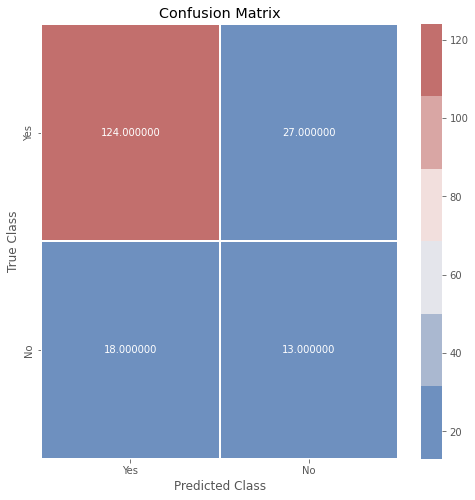

In [75]:
print("----------------------------------------------------------------------------")
print("========================== CROSS VALIDATION PYWEKA ============================")
print("----------------------------------------------------------------------------")
print("")
evl_model_1 = Evaluation(data_modelos_1_2_arff_encoded_train)
evl_model_1.crossvalidate_model(Model_1, data_modelos_1_2_arff_encoded_train, 10, Random(1))
print(evl_model_1.summary())

conf_matrix_1 = evl_model_1.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_1, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [76]:
evaluate_model_cv(sci_Model_1, X_train.to_numpy(), label_encoder.fit_transform(y_train), cv)

,fit_time,score_time,test_score,train_score
0,6.483550,0.007428,0.894737,0.858896
1,7.870203,0.003308,0.789474,0.871166
2,4.928610,0.004283,0.777778,0.871951
3,5.259054,0.003583,0.833333,0.865854
4,5.383696,0.003443,0.888889,0.859756
5,5.662925,0.003411,0.777778,0.871951
6,5.257229,0.006864,0.888889,0.859756
7,4.785119,0.004769,0.888889,0.859756
8,7.434463,0.007313,1.000000,0.847561
9,7.497488,0.005390,0.888889,0.859756


In [77]:
explainer_num = shap.KernelExplainer(sci_Model_1.predict, X_test)

In [78]:
shap_values_num = explainer_num.shap_values(X_test)

  0%|          | 0/78 [00:00<?, ?it/s]

In [79]:
pd.DataFrame(shap_values_num)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.019231,0.0,-0.185897,0.0
1,0.0,0.0,0.0,0.0,-0.083333,0.0,-0.083333,0.0
2,0.0,0.0,0.0,0.0,0.019231,0.0,-0.185897,0.0
3,0.0,0.0,0.0,0.0,0.019231,0.0,-0.185897,0.0
4,0.0,0.0,0.0,0.0,0.019231,0.0,-0.185897,0.0
...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.0,0.0,0.108974,0.0,0.724359,0.0
74,0.0,0.0,0.0,0.0,0.019231,0.0,-0.185897,0.0
75,0.0,0.0,0.0,0.0,0.019231,0.0,-0.185897,0.0
76,0.0,0.0,0.0,0.0,0.019231,0.0,-0.185897,0.0


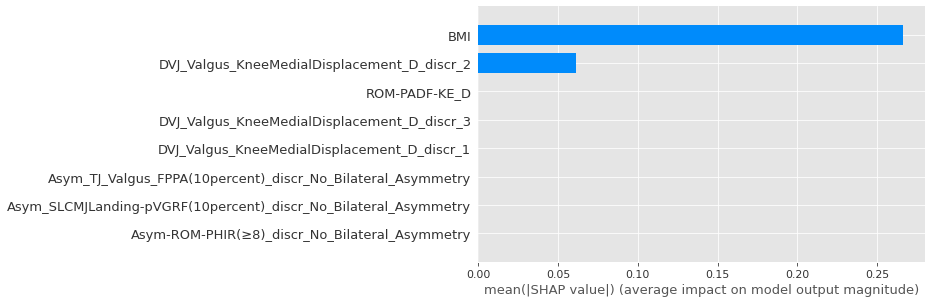

In [80]:
shap.summary_plot(shap_values_num, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns, plot_type="bar")

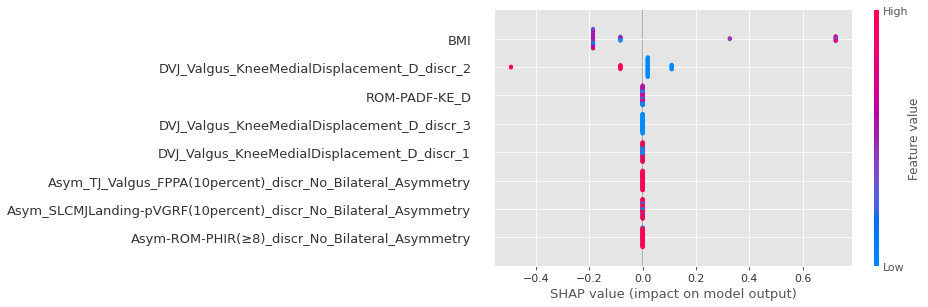

In [81]:
shap.summary_plot(shap_values_num, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns)

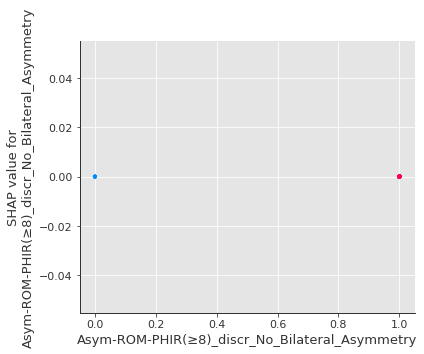

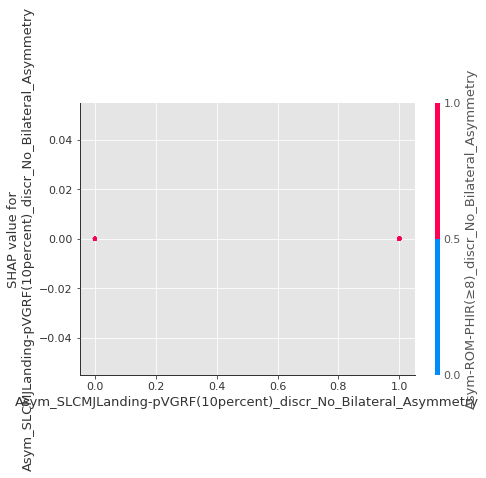

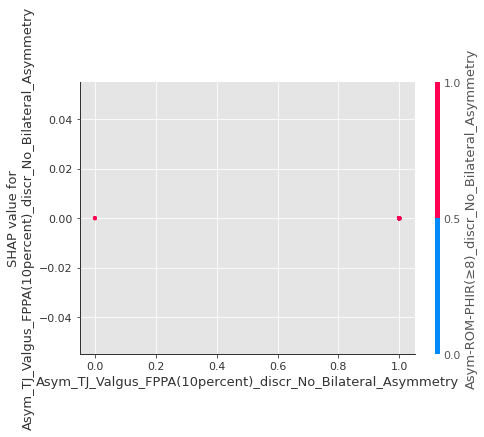

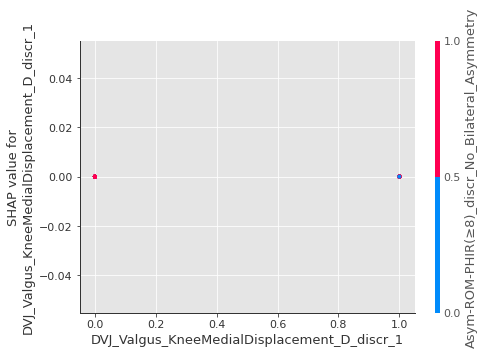

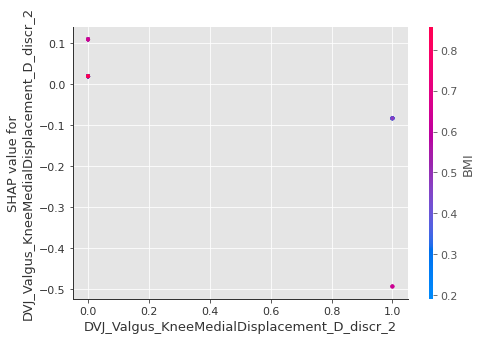

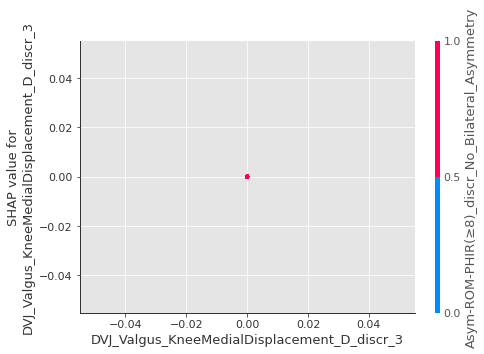

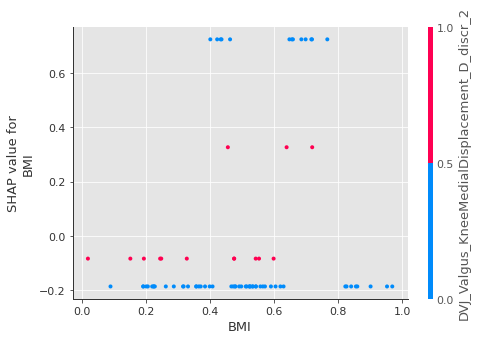

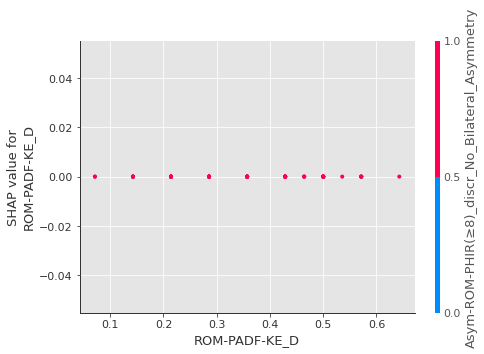

In [82]:
for name in columns:
    shap.dependence_plot(name, shap_values_num, X_test, display_features = X_test)

In [83]:
shap.force_plot(explainer_num.expected_value, shap_values_num[0], 
                X_test.values[0], feature_names = columns, link='logit')

In [84]:
ex_num = shap.Explanation(shap_values_num[0], 
                      explainer_num.expected_value,
                      X_test.iloc[0],  
                      columns)

ex_num

.values =
array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.01923077,
        0.        , -0.18589744,  0.        ])

.base_values =
0.16666666666666666

.data =
Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                     1.000000
Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry    1.000000
Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry        1.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_1                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_2                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_3                        0.000000
BMI                                                                0.571024
ROM-PADF-KE_D                                                      0.357143
Name: 202, dtype: float64

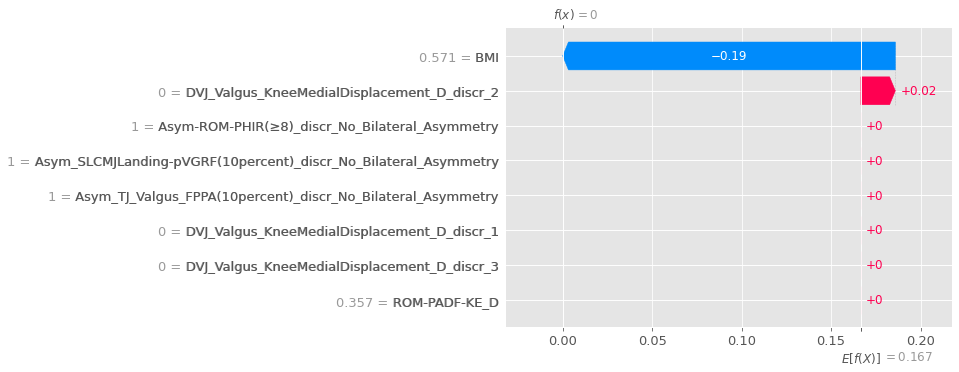

In [85]:
shap.waterfall_plot(ex_num)

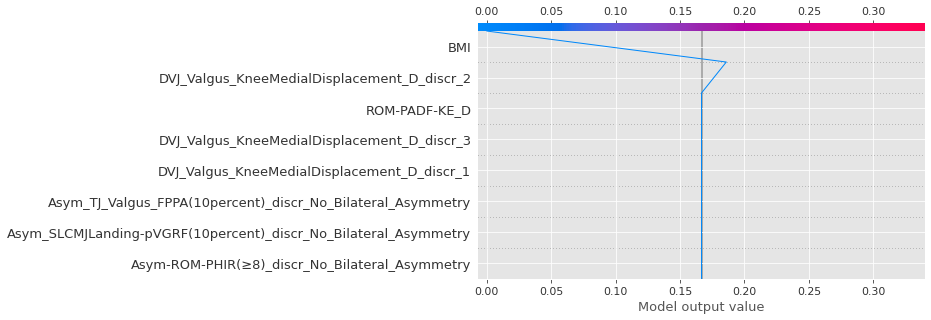

In [86]:
shap.decision_plot(explainer_num.expected_value, shap_values_num[0], columns)

----------------------------------------------------------------------------
============================= TEST MODEL PYWEKA ===============================
----------------------------------------------------------------------------



Correctly Classified Instances          59               75.641  %
Incorrectly Classified Instances        19               24.359  %
Kappa statistic                          0.1493
Mean absolute error                      0.3642
Root mean squared error                  0.4174
Relative absolute error                121.533  %
Root relative squared error            108.7474 %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,859    0,714    0,846      0,859    0,853      0,149    0,670     0,905     0
                 0,286   

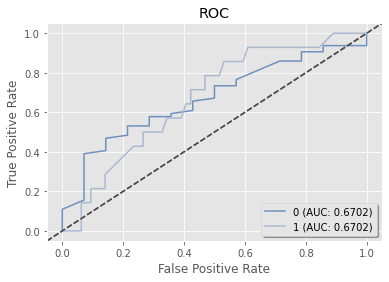

----------------------------------------------------------------------------


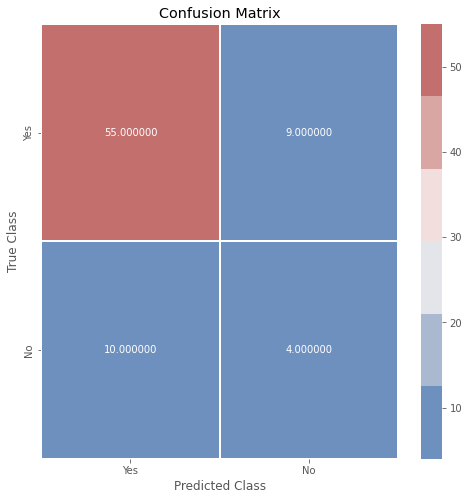

In [87]:
print("----------------------------------------------------------------------------")
print("============================= TEST MODEL PYWEKA ===============================")
print("----------------------------------------------------------------------------")
print("")

evl_model_1 = Evaluation(data_modelos_1_2_arff_encoded_test)
evl_model_1.test_model(Model_1, data_modelos_1_2_arff_encoded_test)
print("")

print(evl_model_1.summary())
print("----------------------------------------------------------------------------")
print(evl_model_1.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_1, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_1 = evl_model_1.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_1, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [101]:
evaluate_models(sci_Model_1, X_test.to_numpy(), label_encoder.fit_transform(y_test), 0)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=AttributeSelectedClassifier:\n\n\n\n=== Attribute Selection on all input data ===\n\nSearch Method:\n\tGreedy Stepwise (backwards).\n\tStart set: all attributes\n\tMerit of best subset found: 0.107\n\nAttribute Subset Evaluator (supervised, Class (nominal): 9 Soft-Tissue_injury_≥4days):\n\tCFS Subset Evaluator\n\tIncluding locally predictive attributes\n\nSelected attributes: 5,7 : 2\n DVJ_Valgus_...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.572545,0.572545,0.576923,0.574505,0.574129


In [103]:
evaluate_models(sci_Model_1, X_test.to_numpy(), label_encoder.fit_transform(y_test), 1)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=AttributeSelectedClassifier:\n\n\n\n=== Attribute Selection on all input data ===\n\nSearch Method:\n\tGreedy Stepwise (backwards).\n\tStart set: all attributes\n\tMerit of best subset found: 0.107\n\nAttribute Subset Evaluator (supervised, Class (nominal): 9 Soft-Tissue_injury_≥4days):\n\tCFS Subset Evaluator\n\tIncluding locally predictive attributes\n\nSelected attributes: 5,7 : 2\n DVJ_Valgus_...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.572545,0.572545,0.576923,0.574505,0.574129


### Modelo 2

In [105]:
base_model_2_RUS = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])

CostS_cls_model_2_RUS = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 2.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_2_RUS.classifier = base_model_2_RUS


RUS = Filter(classname="weka.filters.supervised.instance.SpreadSubsample", options = ["-M","7.5", "-X", "0", "-S","1"])
fc_model_2_RUS = FilteredClassifier(options=["-S","1"])
fc_model_2_RUS.filter = RUS
fc_model_2_RUS.classifier = CostS_cls_model_2_RUS


bagging_cls_model_2_RUS = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_2_RUS.classifier = fc_model_2_RUS


multisearch_cls_model_2_RUS = MultiSearch(options = ["-S", "1"])
multisearch_cls_model_2_RUS.evaluation = "FM"
multisearch_cls_model_2_RUS.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_2_RUS = MathParameter()
mparam_model_2_RUS.prop = "numIterations"
mparam_model_2_RUS.minimum = 5.0
mparam_model_2_RUS.maximum = 50.0
mparam_model_2_RUS.step = 1.0
mparam_model_2_RUS.base = 10.0
mparam_model_2_RUS.expression = "I"
multisearch_cls_model_2_RUS.parameters = [mparam_model_2_RUS]
multisearch_cls_model_2_RUS.classifier = bagging_cls_model_2_RUS


AttS_cls_model_2_RUS = AttributeSelectedClassifier()
AttS_cls_model_2_RUS.search = from_commandline('weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1', classname=get_classname(ASSearch))
AttS_cls_model_2_RUS.evaluation = from_commandline('weka.attributeSelection.CfsSubsetEval -P 1 -E 1', classname=get_classname(ASEvaluation))
AttS_cls_model_2_RUS.classifier = multisearch_cls_model_2_RUS


missing_model_2_RUS = Filter(classname = "weka.filters.unsupervised.attribute.ReplaceMissingValues")
Model_2_RUS = FilteredClassifier(options=["-S","1"])
Model_2_RUS.filter = missing_model_2_RUS
Model_2_RUS.classifier = AttS_cls_model_2_RUS

In [106]:
print("----------------------------------------------------------------------------")
print("================================ Model =====================================")
print("----------------------------------------------------------------------------")
print(Model_2_RUS.to_commandline())

----------------------------------------------------------------------------
================================ Model =====================================
----------------------------------------------------------------------------
weka.classifiers.meta.FilteredClassifier -F "weka.filters.unsupervised.attribute.ReplaceMissingValues " -S 1 -W weka.classifiers.meta.AttributeSelectedClassifier -- -E "weka.attributeSelection.CfsSubsetEval -P 1 -E 1" -S "weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1" -W weka.classifiers.meta.MultiSearch -- -E FM -search "weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max 50.0 -step 1.0 -base 10.0 -expression I" -class-label 1 -algorithm "weka.classifiers.meta.multisearch.DefaultSearch -sample-size 100.0 -initial-folds 2 -subsequent-folds 10 -initial-test-set . -subsequent-test-set . -num-slots 1" -log-file /home/pablo/TFG_dir/TFG_env -S 1 -W weka.classifiers.meta.Bagging -- -P 100 -S 1 -num-

In [107]:
sci_Model_2_RUS = weka_classifier(Model_2_RUS, data_modelos_1_2_arff_encoded_train)
sci_Model_2_RUS.fit2()

sci_Model_2_RUS

weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.CfsSubsetEval -P 1 -E 1" -S "weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1" -W weka.classifiers.meta.MultiSearch -- -E FM -search "weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...
1,1,1,0,0,0,0.491992,0.642857,0
1,1,1,0,0,1,0.28823,0.5,0
1,1,1,1,0,0,0.373821,0.357143,0
1,0,1,1,0,0,0.132362,0.214286,0
1,0,1,0,0,0,0.444517,0.214286,0
1,1,1,0,0,0,0.59028,0.071429,0
1,0,1,1,0,0,0.386125,0.571429,1
1,1,1,1,0,0,0.662717,0.464286,1
1,0,1,0,0,1,0.413098,0.357143,0
1,0,1,0,0,0,0.357405,0.357143,0
1,1,1,1,0,0,0.702233,0.357143,1
1,1,1,1,0,0,0.39637,0.428571,0)

----------------------------------------------------------------------------
========================== CROSS VALIDATION PYWEKA ============================
----------------------------------------------------------------------------


Correctly Classified Instances         151               82.967  %
Incorrectly Classified Instances        31               17.033  %
Kappa statistic                          0     
Mean absolute error                      0.2712
Root mean squared error                  0.3617
Relative absolute error                 95.0776 %
Root relative squared error             96.1969 %
Total Number of Instances              182     



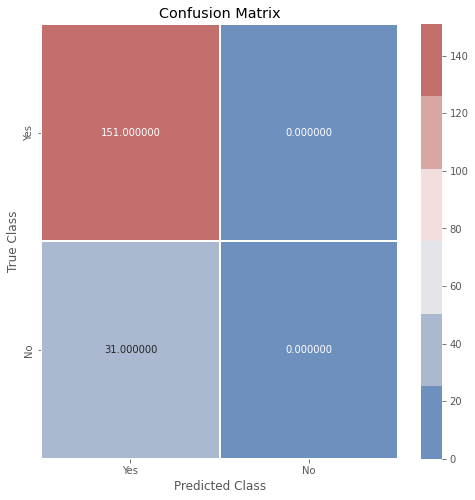

In [108]:
print("----------------------------------------------------------------------------")
print("========================== CROSS VALIDATION PYWEKA ============================")
print("----------------------------------------------------------------------------")
print("")
evl_model_2_RUS = Evaluation(data_modelos_1_2_arff_encoded_train)
evl_model_2_RUS.crossvalidate_model(Model_2_RUS, data_modelos_1_2_arff_encoded_train, 10, Random(1))
print(evl_model_2_RUS.summary())

conf_matrix_2_RUS = evl_model_2_RUS.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_2_RUS, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [109]:
evaluate_model_cv(sci_Model_2_RUS, X_train.to_numpy(), label_encoder.fit_transform(y_train), cv)

,fit_time,score_time,test_score,train_score
0,3.950489,0.004751,0.842105,0.828221
1,3.621783,0.004015,0.789474,0.834356
2,3.717706,0.003983,0.833333,0.829268
3,3.593173,0.004474,0.833333,0.829268
4,3.837957,0.003729,0.833333,0.829268
5,3.668716,0.004261,0.833333,0.829268
6,3.730044,0.003921,0.833333,0.829268
7,3.791665,0.004440,0.833333,0.829268
8,4.384809,0.003893,0.833333,0.829268
9,3.543224,0.003926,0.833333,0.829268


In [110]:
explainer_2_RUS = shap.KernelExplainer(sci_Model_2_RUS.predict, X_test)
shap_values_2_RUS = explainer_2_RUS.shap_values(X_test)

  0%|          | 0/78 [00:00<?, ?it/s]

In [111]:
pd.DataFrame(shap_values_2_RUS)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


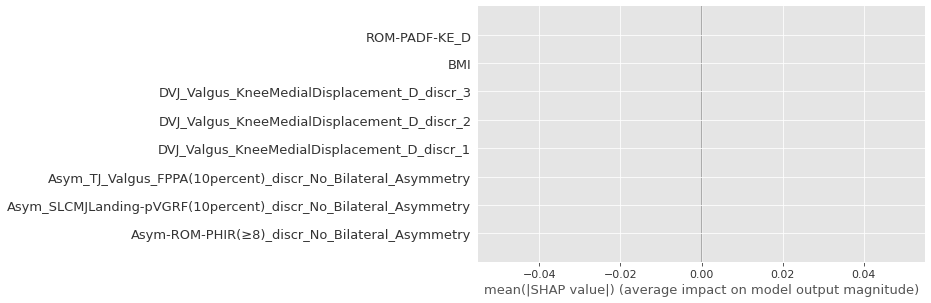

In [112]:
shap.summary_plot(shap_values_2_RUS, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns, plot_type="bar")

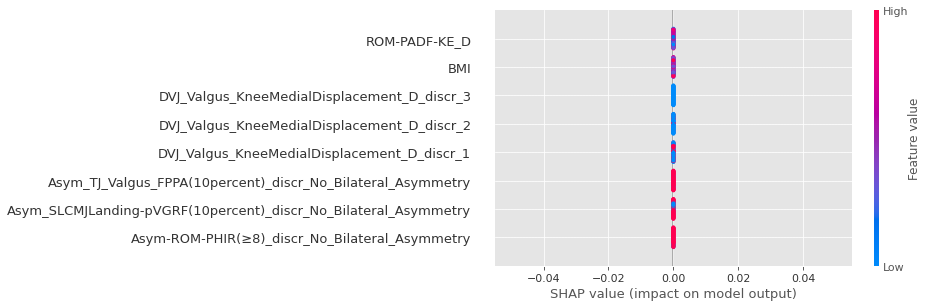

In [113]:
shap.summary_plot(shap_values_2_RUS, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns)

In [114]:
shap.force_plot(explainer_2_RUS.expected_value, shap_values_2_RUS, X_test)

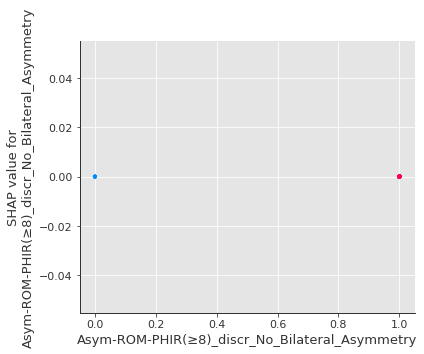

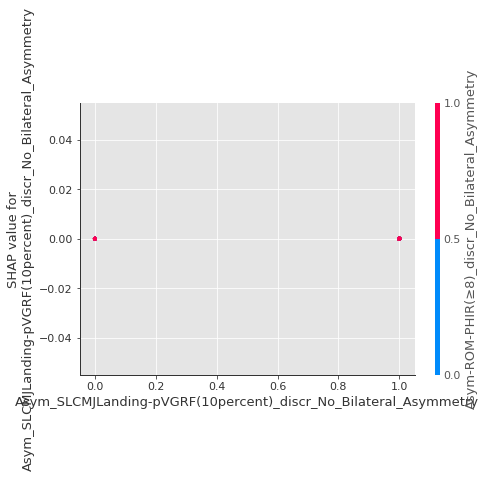

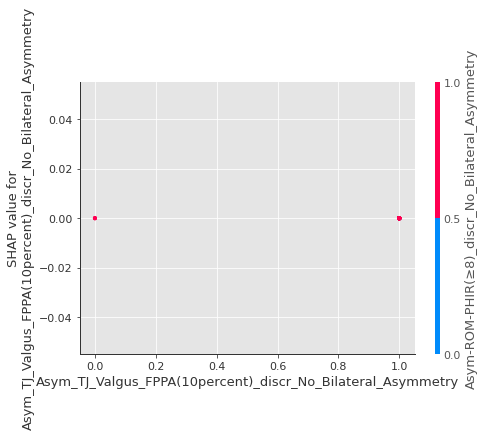

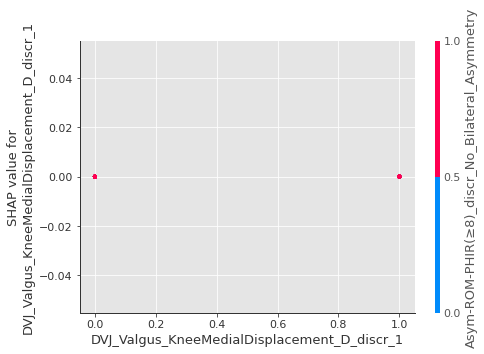

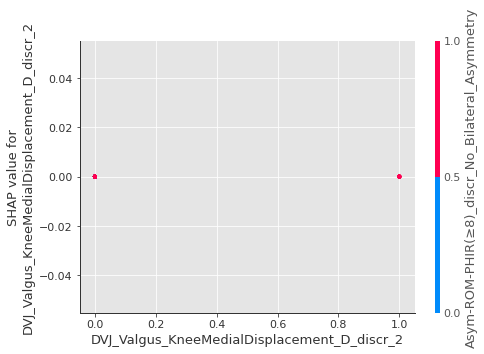

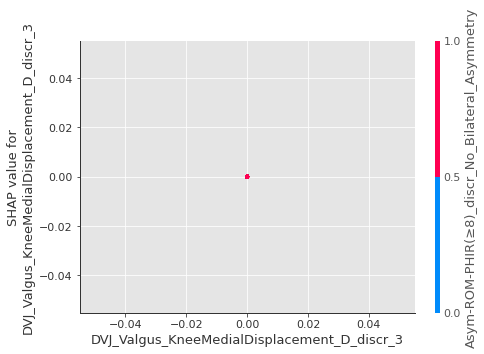

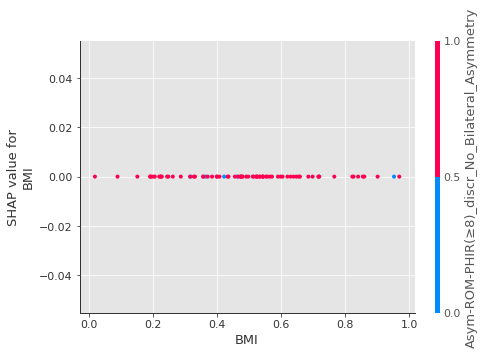

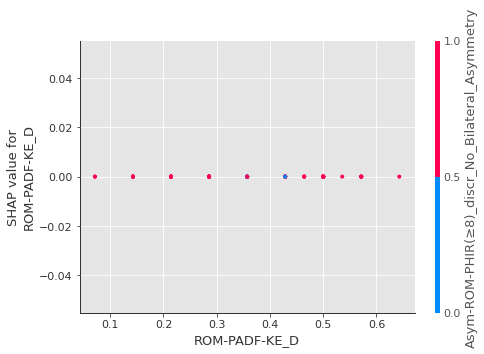

In [115]:
for name in columns:
    shap.dependence_plot(name, shap_values_2_RUS, X_test, display_features = X_test)

In [116]:
shap.force_plot(explainer_2_RUS.expected_value, shap_values_2_RUS[0], 
                X_test.values[0], feature_names = columns, link='logit')

In [117]:
ex = shap.Explanation(shap_values_2_RUS[0], 
                      explainer_2_RUS.expected_value,
                      X_test.iloc[0],  
                      columns)

ex

.values =
array([0., 0., 0., 0., 0., 0., 0., 0.])

.base_values =
0.0

.data =
Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                     1.000000
Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry    1.000000
Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry        1.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_1                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_2                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_3                        0.000000
BMI                                                                0.571024
ROM-PADF-KE_D                                                      0.357143
Name: 202, dtype: float64

In [118]:
shap.waterfall_plot(ex)

ValueError: Image size of 524340x372 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x396 with 3 Axes>

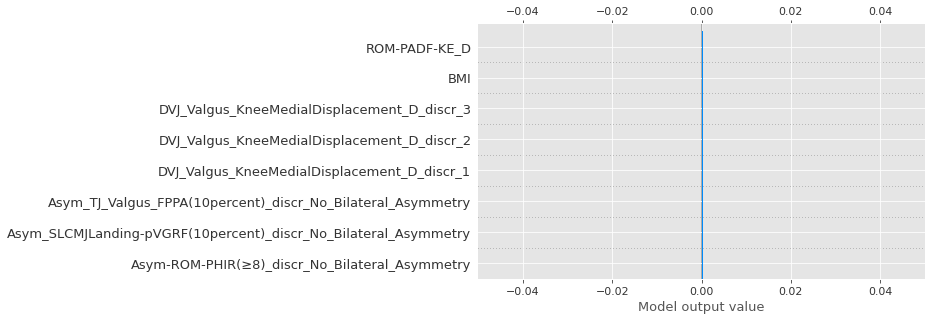

In [119]:
shap.decision_plot(explainer_2_RUS.expected_value, shap_values_2_RUS[0], columns)

----------------------------------------------------------------------------
============================= TEST MODEL PYWEKA ===============================
----------------------------------------------------------------------------



Correctly Classified Instances          64               82.0513 %
Incorrectly Classified Instances        14               17.9487 %
Kappa statistic                          0     
Mean absolute error                      0.2801
Root mean squared error                  0.3738
Relative absolute error                 93.4589 %
Root relative squared error             97.3842 %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    1,000    0,821      1,000    0,901      ?        0,691     0,910     0
                 0,000   

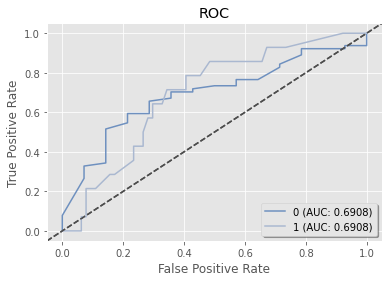

----------------------------------------------------------------------------


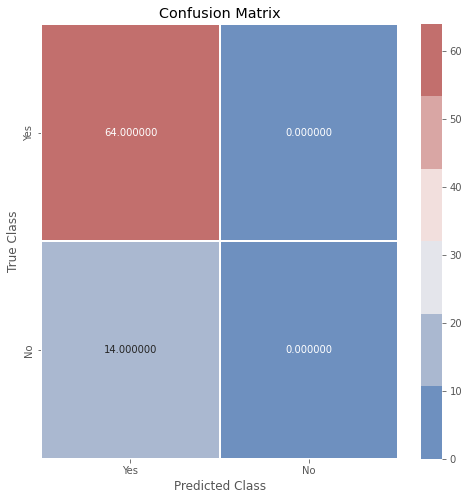

In [120]:
print("----------------------------------------------------------------------------")
print("============================= TEST MODEL PYWEKA ===============================")
print("----------------------------------------------------------------------------")
print("")
evl_model_2_RUS = Evaluation(data_modelos_1_2_arff_encoded_test)
evl_model_2_RUS.test_model(Model_2_RUS, data_modelos_1_2_arff_encoded_test)
print("")

print(evl_model_2_RUS.summary())
print("----------------------------------------------------------------------------")
print(evl_model_2_RUS.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_2_RUS, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_2_RUS = evl_model_2_RUS.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_2_RUS, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [121]:
evaluate_models(sci_Model_2_RUS, X_test.to_numpy(), label_encoder.fit_transform(y_test), 0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E ""weka.attributeSelection.CfsSubsetEval -P 1 -E 1"" -S ""weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1"" -W weka.classifiers.meta.MultiSearch -- -E FM -search ""weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.5,0.5,0.410256,0.450704,0.46524


In [122]:
evaluate_models(sci_Model_2_RUS, X_test.to_numpy(), label_encoder.fit_transform(y_test), 1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E ""weka.attributeSelection.CfsSubsetEval -P 1 -E 1"" -S ""weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1"" -W weka.classifiers.meta.MultiSearch -- -E FM -search ""weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.5,0.5,0.410256,0.450704,0.46524


### Modelo 2 ROS

In [123]:
base_model_2_ROS = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])


CostS_cls_model_2_ROS = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 2.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_2_ROS.classifier = base_model_2_ROS


ROS = Filter(classname="weka.filters.supervised.instance.Resample", options = ["-B","1","-Z","230"])
fc_model_2_ROS = FilteredClassifier(options=["-S","1"])
fc_model_2_ROS.filter = ROS
fc_model_2_ROS.classifier = CostS_cls_model_2_ROS


bagging_cls_model_2_ROS = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_2_ROS.classifier = fc_model_2_ROS


multisearch_cls_model_2_ROS = MultiSearch(options = ["-S", "1"])
multisearch_cls_model_2_ROS.evaluation = "FM"
multisearch_cls_model_2_ROS.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_2_ROS = MathParameter()
mparam_model_2_ROS.prop = "numIterations"
mparam_model_2_ROS.minimum = 5.0
mparam_model_2_ROS.maximum = 50.0
mparam_model_2_ROS.step = 1.0
mparam_model_2_ROS.base = 10.0
mparam_model_2_ROS.expression = "I"
multisearch_cls_model_2_ROS.parameters = [mparam_model_2_ROS]
multisearch_cls_model_2_ROS.classifier = bagging_cls_model_2_ROS


AttS_cls_model_2_ROS = AttributeSelectedClassifier()
AttS_cls_model_2_ROS.search = from_commandline('weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1', classname=get_classname(ASSearch))
AttS_cls_model_2_ROS.evaluation = from_commandline('weka.attributeSelection.CfsSubsetEval -P 1 -E 1', classname=get_classname(ASEvaluation))
AttS_cls_model_2_ROS.classifier = multisearch_cls_model_2_ROS

missing = Filter(classname = "weka.filters.unsupervised.attribute.ReplaceMissingValues")
Model_2_ROS = FilteredClassifier(options=["-S","1"])
Model_2_ROS.filter = missing
Model_2_ROS.classifier = AttS_cls_model_2_ROS

In [124]:
sci_Model_2_ROS = weka_classifier(Model_2_ROS, data_modelos_1_2_arff_encoded_train)
sci_Model_2_ROS.fit2()

sci_Model_2_ROS

weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.CfsSubsetEval -P 1 -E 1" -S "weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1" -W weka.classifiers.meta.MultiSearch -- -E FM -search "weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...
1,1,1,0,0,0,0.491992,0.642857,0
1,1,1,0,0,1,0.28823,0.5,0
1,1,1,1,0,0,0.373821,0.357143,0
1,0,1,1,0,0,0.132362,0.214286,0
1,0,1,0,0,0,0.444517,0.214286,0
1,1,1,0,0,0,0.59028,0.071429,0
1,0,1,1,0,0,0.386125,0.571429,1
1,1,1,1,0,0,0.662717,0.464286,1
1,0,1,0,0,1,0.413098,0.357143,0
1,0,1,0,0,0,0.357405,0.357143,0
1,1,1,1,0,0,0.702233,0.357143,1
1,1,1,1,0,0,0.39637,0.428571,0)

----------------------------------------------------------------------------
========================== CROSS VALIDATION PYWEKA ============================
----------------------------------------------------------------------------


Correctly Classified Instances         138               75.8242 %
Incorrectly Classified Instances        44               24.1758 %
Kappa statistic                          0.1221
Mean absolute error                      0.3305
Root mean squared error                  0.396 
Relative absolute error                115.8522 %
Root relative squared error            105.3109 %
Total Number of Instances              182     



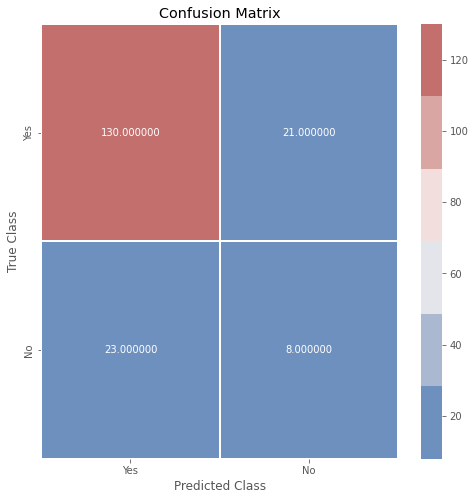

In [125]:
print("----------------------------------------------------------------------------")
print("========================== CROSS VALIDATION PYWEKA ============================")
print("----------------------------------------------------------------------------")
print("")
evl_model_2_ROS = Evaluation(data_modelos_1_2_arff_encoded_train)
evl_model_2_ROS.crossvalidate_model(Model_2_ROS, data_modelos_1_2_arff_encoded_train, 10, Random(1))
print(evl_model_2_ROS.summary())

conf_matrix_2_ROS = evl_model_2_ROS.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_2_ROS, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [126]:
evaluate_model_cv(sci_Model_2_ROS, X_train.to_numpy(), label_encoder.fit_transform(y_train), cv)

,fit_time,score_time,test_score,train_score
0,4.132806,0.003711,0.842105,0.840491
1,4.055680,0.003927,0.789474,0.846626
2,3.991318,0.003088,0.777778,0.847561
3,3.904609,0.002903,0.833333,0.841463
4,4.217225,0.003230,0.833333,0.841463
5,4.460288,0.003138,0.833333,0.841463
6,3.800973,0.002905,0.888889,0.835366
7,3.752332,0.002843,0.888889,0.835366
8,4.117091,0.002869,0.888889,0.835366
9,4.042996,0.002959,0.833333,0.841463


In [127]:
explainer_2_ROS = shap.KernelExplainer(sci_Model_2_ROS.predict, X_test)
shap_values_2_ROS = explainer_2_ROS.shap_values(X_test)

  0%|          | 0/78 [00:00<?, ?it/s]

In [128]:
pd.DataFrame(shap_values_2_ROS)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.102564,0.0,0.769231,0.0
1,0.0,0.0,0.0,0.0,-0.064103,0.0,-0.064103,0.0
2,0.0,0.0,0.0,0.0,0.012821,0.0,-0.141026,0.0
3,0.0,0.0,0.0,0.0,0.012821,0.0,-0.141026,0.0
4,0.0,0.0,0.0,0.0,0.012821,0.0,-0.141026,0.0
...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.0,0.0,0.012821,0.0,-0.141026,0.0
74,0.0,0.0,0.0,0.0,0.012821,0.0,-0.141026,0.0
75,0.0,0.0,0.0,0.0,0.012821,0.0,-0.141026,0.0
76,0.0,0.0,0.0,0.0,0.012821,0.0,-0.141026,0.0


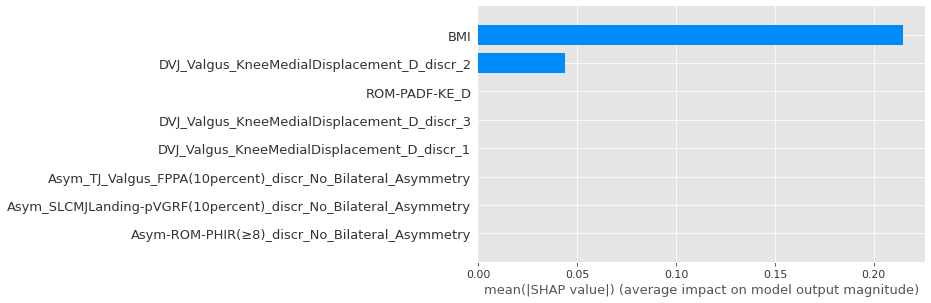

In [129]:
shap.summary_plot(shap_values_2_ROS, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns, plot_type="bar")

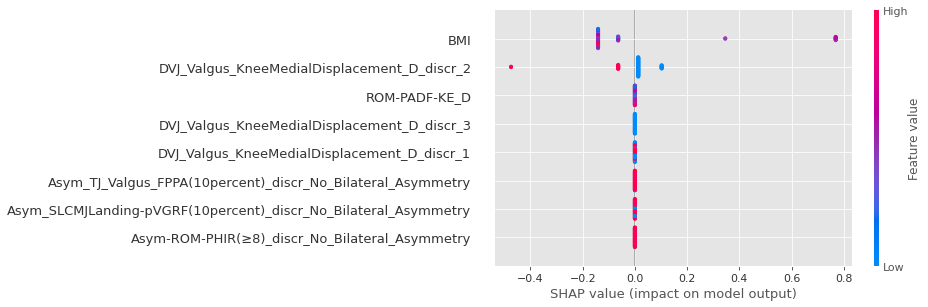

In [130]:
shap.summary_plot(shap_values_2_ROS, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns)

In [131]:
shap.force_plot(explainer_2_ROS.expected_value, shap_values_2_ROS, X_test)

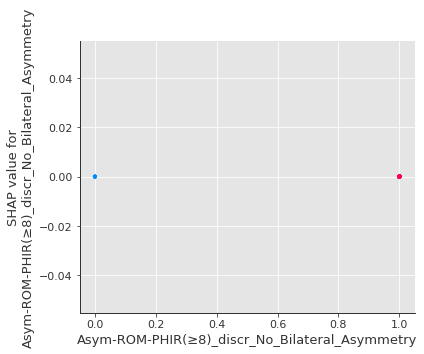

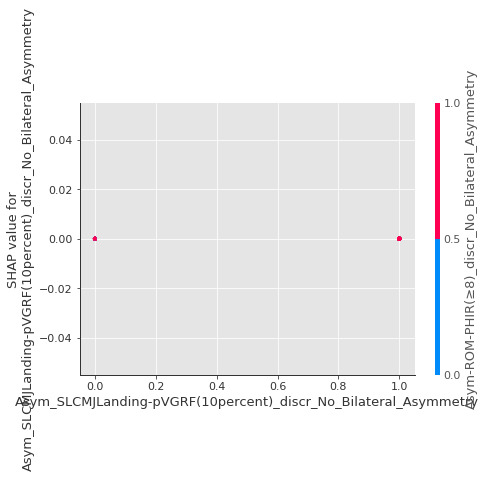

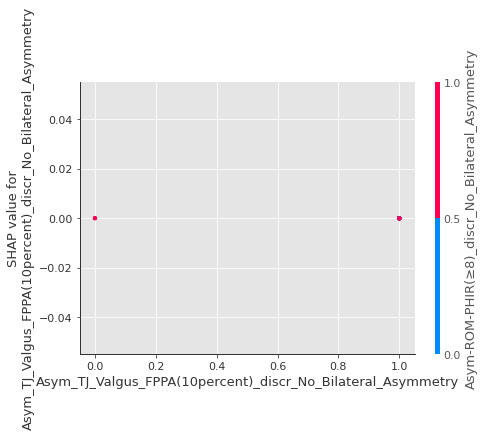

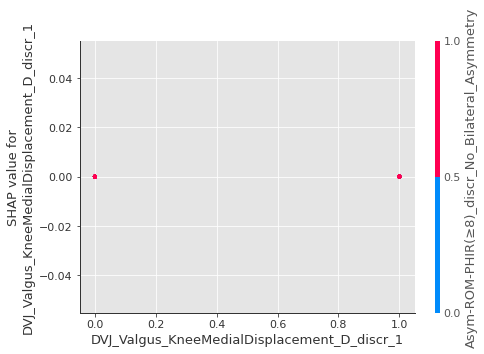

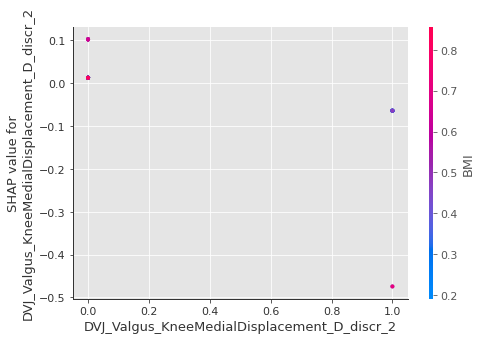

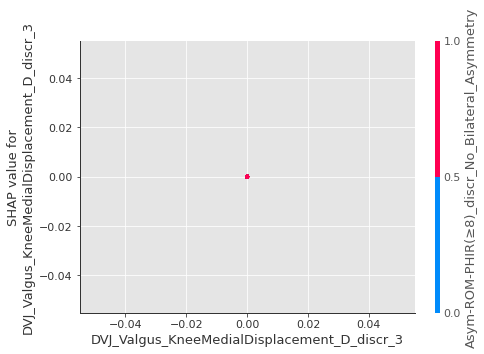

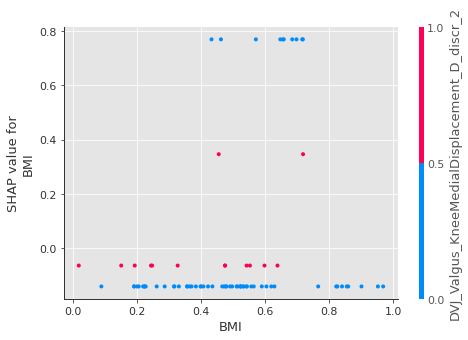

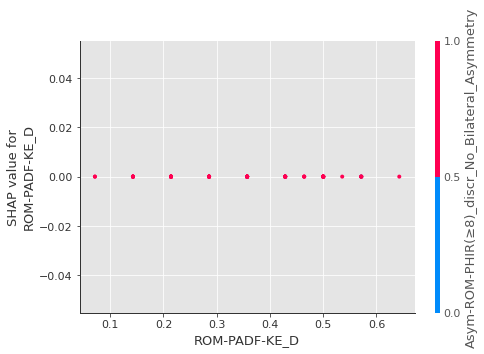

In [132]:
for name in columns:
    shap.dependence_plot(name, shap_values_2_ROS, X_test, display_features = X_test)

In [133]:
shap.force_plot(explainer_2_ROS.expected_value, shap_values_2_ROS[0], 
                X_test.values[0], feature_names = columns, link='logit')

In [134]:
ex = shap.Explanation(shap_values_2_ROS[0], 
                      explainer_2_ROS.expected_value,
                      X_test.iloc[0],  
                      columns)

ex

.values =
array([0.        , 0.        , 0.        , 0.        , 0.1025641 ,
       0.        , 0.76923077, 0.        ])

.base_values =
0.1282051282051282

.data =
Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                     1.000000
Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry    1.000000
Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry        1.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_1                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_2                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_3                        0.000000
BMI                                                                0.571024
ROM-PADF-KE_D                                                      0.357143
Name: 202, dtype: float64

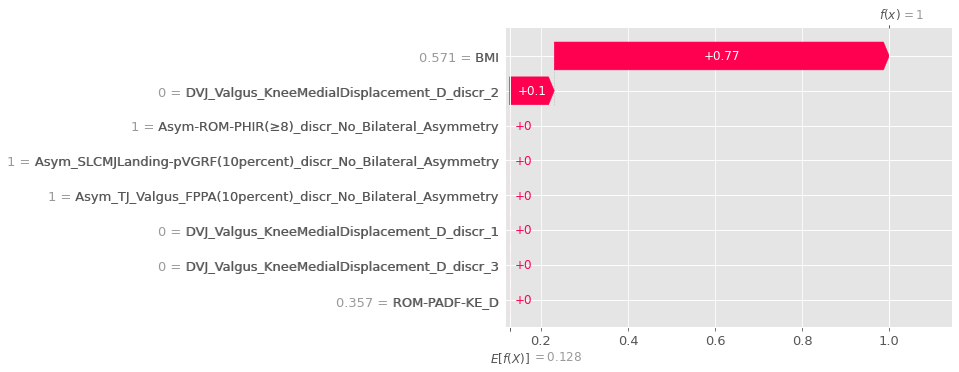

In [135]:
shap.waterfall_plot(ex)

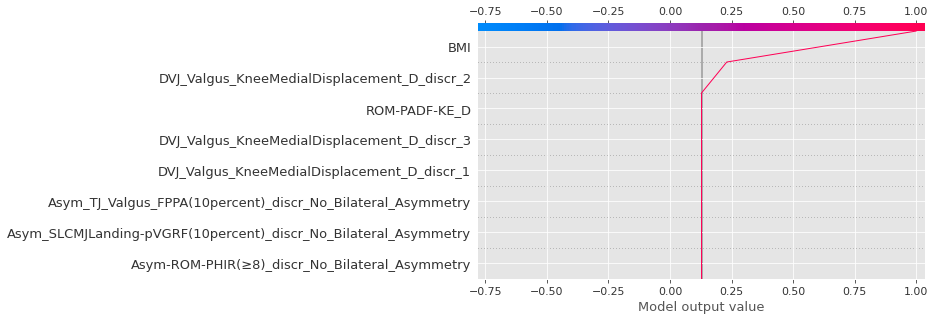

In [136]:
shap.decision_plot(explainer_2_ROS.expected_value, shap_values_2_ROS[0], columns)

----------------------------------------------------------------------------
============================= TEST MODEL PYWEKA ===============================
----------------------------------------------------------------------------



Correctly Classified Instances          60               76.9231 %
Incorrectly Classified Instances        18               23.0769 %
Kappa statistic                          0.1181
Mean absolute error                      0.3316
Root mean squared error                  0.3999
Relative absolute error                110.6475 %
Root relative squared error            104.1844 %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,891    0,786    0,838      0,891    0,864      0,120    0,699     0,915     0
                 0,214   

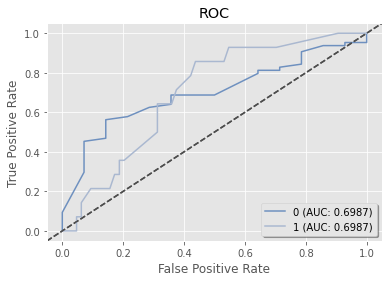

----------------------------------------------------------------------------


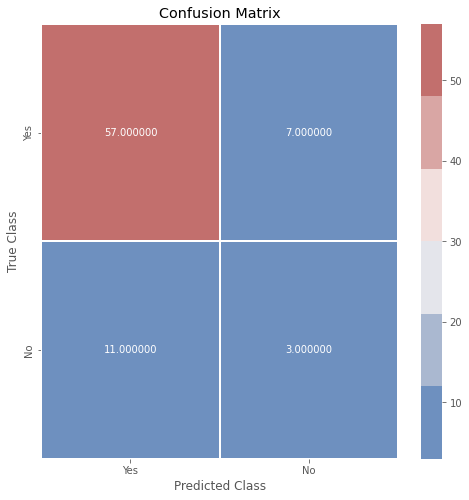

In [137]:
print("----------------------------------------------------------------------------")
print("============================= TEST MODEL PYWEKA ===============================")
print("----------------------------------------------------------------------------")
print("")
evl_model_2_ROS = Evaluation(data_modelos_1_2_arff_encoded_test)
evl_model_2_ROS.test_model(Model_2_ROS, data_modelos_1_2_arff_encoded_test)
print("")

print(evl_model_2_ROS.summary())
print("----------------------------------------------------------------------------")
print(evl_model_2_ROS.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_2_ROS, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_2_ROS = evl_model_2_ROS.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_2_ROS, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [138]:
evaluate_models(sci_Model_2_ROS, X_test.to_numpy(), label_encoder.fit_transform(y_test), 0)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E ""weka.attributeSelection.CfsSubsetEval -P 1 -E 1"" -S ""weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1"" -W weka.classifiers.meta.MultiSearch -- -E FM -search ""weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.552455,0.552455,0.569118,0.556818,0.557712


In [139]:
evaluate_models(sci_Model_2_ROS, X_test.to_numpy(), label_encoder.fit_transform(y_test), 1)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E ""weka.attributeSelection.CfsSubsetEval -P 1 -E 1"" -S ""weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1"" -W weka.classifiers.meta.MultiSearch -- -E FM -search ""weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.552455,0.552455,0.569118,0.556818,0.557712


### Modelo 2 Rus y Ros

In [140]:
base_model_2_RUS_ROS = Classifier(classname="weka.classifiers.trees.ADTree", 
                  options=["-B", "10", "-E", "-3", "-S", "1"])


CostS_cls_model_2_RUS_ROS = SingleClassifierEnhancer(classname="weka.classifiers.meta.CostSensitiveClassifier", 
                                options =["-cost-matrix", "[0.0 2.0; 1.0 0.0]", "-S", "1"])
CostS_cls_model_2_RUS_ROS.classifier = base_model_2_RUS_ROS


RUS = Filter(classname="weka.filters.supervised.instance.SpreadSubsample", options = ["-M","5", "-X", "0", "-S","1"])
fc_model_2_RUS_ROS = FilteredClassifier(options=["-S","1"])
fc_model_2_RUS_ROS.filter = RUS
fc_model_2_RUS_ROS.classifier = CostS_cls_model_2_RUS_ROS

ROS = Filter(classname="weka.filters.supervised.instance.Resample", options = ["-B","1","-Z","165"])
fc2_model_2_RUS_ROS = FilteredClassifier(options=["-S","1"])
fc2_model_2_RUS_ROS.filter = ROS
fc2_model_2_RUS_ROS.classifier = fc_model_2_RUS_ROS


bagging_cls_model_2_RUS_ROS = SingleClassifierEnhancer(classname="weka.classifiers.meta.Bagging",
                         options=["-P", "100", "-S", "1", "-num-slots", "1", "-I", "100"])
bagging_cls_model_2_RUS_ROS.classifier = fc2_model_2_RUS_ROS


multisearch_cls_model_2_RUS_ROS = MultiSearch(options = ["-S", "1"])
multisearch_cls_model_2_RUS_ROS.evaluation = "FM"
multisearch_cls_model_2_RUS_ROS.search = ["-sample-size", "100", "-initial-folds", "2", "-subsequent-folds", "10",
                          "-initial-test-set", ".", "-subsequent-test-set", ".", "-num-slots", "1"]                        
mparam_model_2_RUS_ROS = MathParameter()
mparam_model_2_RUS_ROS.prop = "numIterations"
mparam_model_2_RUS_ROS.minimum = 5.0
mparam_model_2_RUS_ROS.maximum = 50.0
mparam_model_2_RUS_ROS.step = 1.0
mparam_model_2_RUS_ROS.base = 10.0
mparam_model_2_RUS_ROS.expression = "I"
multisearch_cls_model_2_RUS_ROS.parameters = [mparam_model_2_RUS_ROS]
multisearch_cls_model_2_RUS_ROS.classifier = bagging_cls_model_2_RUS_ROS


AttS_cls_model_2_RUS_ROS = AttributeSelectedClassifier()
AttS_cls_model_2_RUS_ROS.search = from_commandline('weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1', classname=get_classname(ASSearch))
AttS_cls_model_2_RUS_ROS.evaluation = from_commandline('weka.attributeSelection.CfsSubsetEval -P 1 -E 1', classname=get_classname(ASEvaluation))
AttS_cls_model_2_RUS_ROS.classifier = multisearch_cls_model_2_RUS_ROS

missing = Filter(classname = "weka.filters.unsupervised.attribute.ReplaceMissingValues")
Model_2_RUS_ROS = FilteredClassifier(options=["-S","1"])
Model_2_RUS_ROS.filter = missing
Model_2_RUS_ROS.classifier = AttS_cls_model_2_RUS_ROS

In [141]:
sci_Model_2_RUS_ROS = weka_classifier(Model_2_RUS_ROS, data_modelos_1_2_arff_encoded_train)
sci_Model_2_RUS_ROS.fit2()

sci_Model_2_RUS_ROS

weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E "weka.attributeSelection.CfsSubsetEval -P 1 -E 1" -S "weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1" -W weka.classifiers.meta.MultiSearch -- -E FM -search "weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...
1,1,1,0,0,0,0.491992,0.642857,0
1,1,1,0,0,1,0.28823,0.5,0
1,1,1,1,0,0,0.373821,0.357143,0
1,0,1,1,0,0,0.132362,0.214286,0
1,0,1,0,0,0,0.444517,0.214286,0
1,1,1,0,0,0,0.59028,0.071429,0
1,0,1,1,0,0,0.386125,0.571429,1
1,1,1,1,0,0,0.662717,0.464286,1
1,0,1,0,0,1,0.413098,0.357143,0
1,0,1,0,0,0,0.357405,0.357143,0
1,1,1,1,0,0,0.702233,0.357143,1
1,1,1,1,0,0,0.39637,0.428571,0)

----------------------------------------------------------------------------
========================== CROSS VALIDATION PYWEKA ============================
----------------------------------------------------------------------------


Correctly Classified Instances         144               79.1209 %
Incorrectly Classified Instances        38               20.8791 %
Kappa statistic                          0.2213
Mean absolute error                      0.3363
Root mean squared error                  0.3975
Relative absolute error                117.8822 %
Root relative squared error            105.723  %
Total Number of Instances              182     



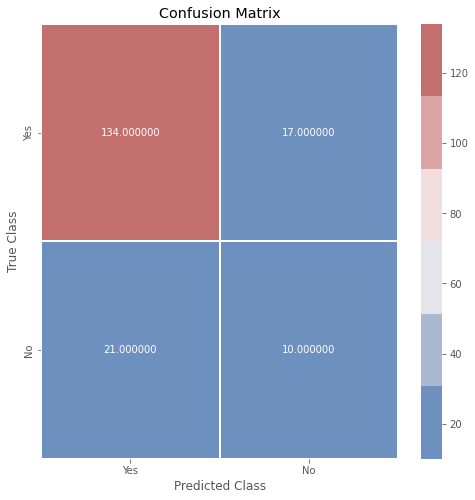

In [142]:
print("----------------------------------------------------------------------------")
print("========================== CROSS VALIDATION PYWEKA ============================")
print("----------------------------------------------------------------------------")
print("")
evl_model_2_RUS_ROS = Evaluation(data_modelos_1_2_arff_encoded_train)
evl_model_2_RUS_ROS.crossvalidate_model(Model_2_RUS_ROS, data_modelos_1_2_arff_encoded_train, 10, Random(1))
print(evl_model_2_RUS_ROS.summary())

conf_matrix_2_RUS_ROS = evl_model_2_RUS_ROS.confusion_matrix
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix_2_RUS_ROS, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"),
            fmt = "f", linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [143]:
evaluate_model_cv(sci_Model_2_RUS_ROS, X_train.to_numpy(), label_encoder.fit_transform(y_train), cv)

,fit_time,score_time,test_score,train_score
0,3.644534,0.003053,0.842105,0.846626
1,3.398060,0.003179,0.736842,0.858896
2,3.048513,0.002947,0.777778,0.853659
3,3.371361,0.002965,0.833333,0.847561
4,3.242117,0.003075,0.888889,0.841463
5,3.090059,0.003358,0.833333,0.847561
6,3.350883,0.003256,0.833333,0.847561
7,3.342126,0.003268,0.944444,0.835366
8,3.041661,0.003176,0.888889,0.841463
9,3.390009,0.003208,0.888889,0.841463


In [144]:
explainer_2_RUS_ROS = shap.KernelExplainer(sci_Model_2_RUS_ROS.predict, X_test)
shap_values_2_RUS_ROS = explainer_2_RUS_ROS.shap_values(X_test)

  0%|          | 0/78 [00:00<?, ?it/s]

In [145]:
pd.DataFrame(shap_values_2_RUS_ROS)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0
1,0.0,0.0,0.0,0.0,-0.070513,0.0,-0.070513,0.0
2,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0
3,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0
4,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0
...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0
74,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0
75,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0
76,0.0,0.0,0.0,0.0,0.019231,0.0,-0.160256,0.0


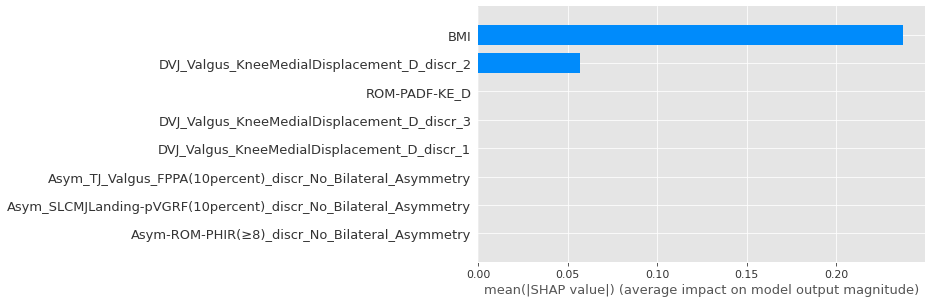

In [146]:
shap.summary_plot(shap_values_2_RUS_ROS, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns, plot_type="bar")

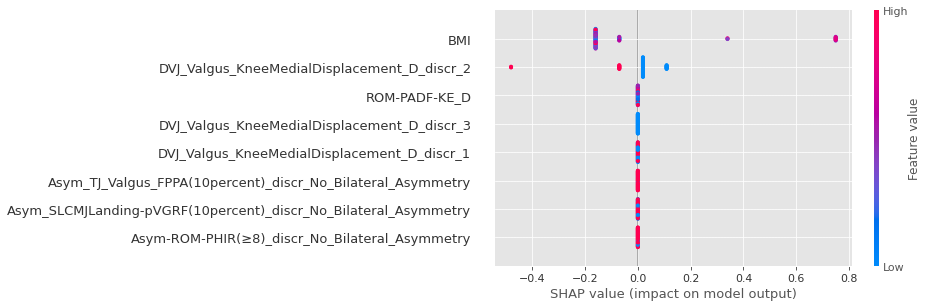

In [147]:
shap.summary_plot(shap_values_2_RUS_ROS, X_test.values, class_names=["Yes", "No"], 
                  feature_names = columns)

In [148]:
shap.force_plot(explainer_2_RUS_ROS.expected_value, shap_values_2_RUS_ROS, X_test)

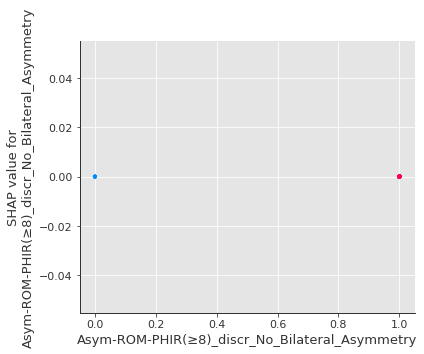

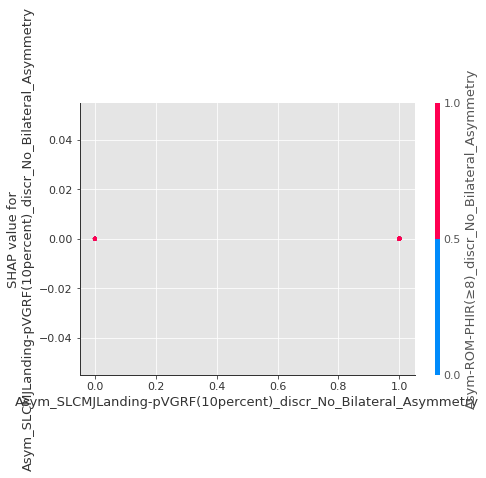

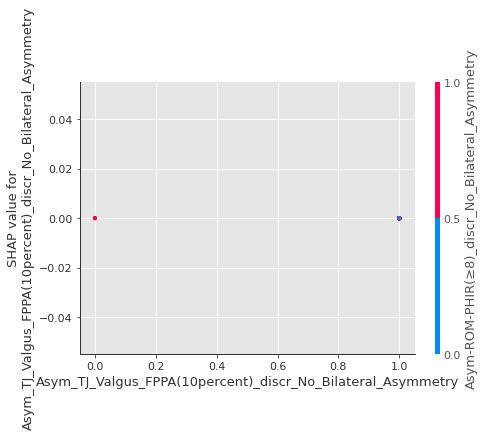

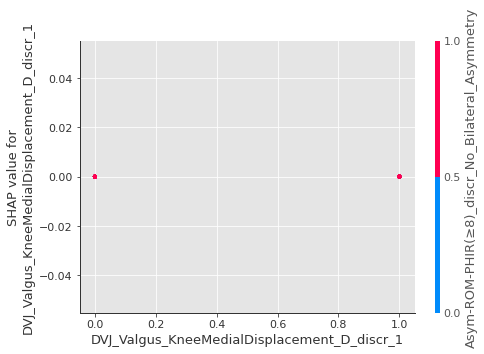

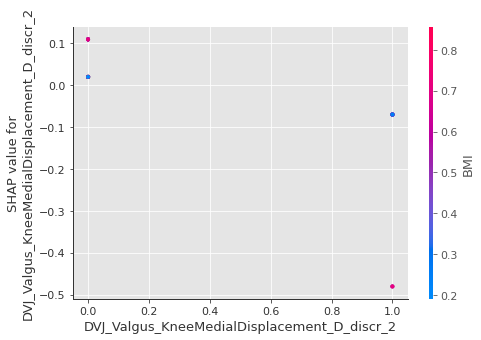

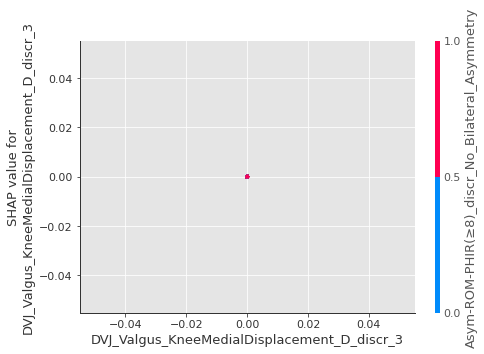

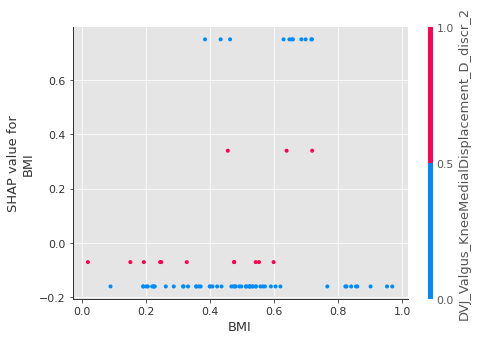

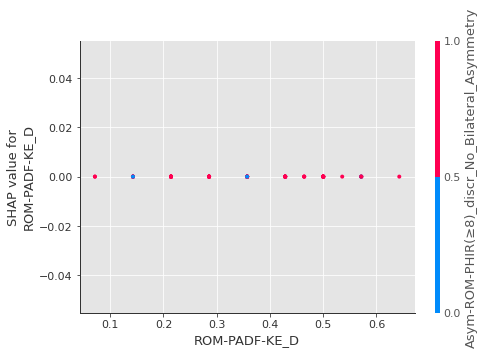

In [149]:
for name in columns:
    shap.dependence_plot(name, shap_values_2_RUS_ROS, X_test, display_features = X_test)

In [150]:
shap.force_plot(explainer_2_RUS_ROS.expected_value, shap_values_2_RUS_ROS[0], 
                X_test.values[0], feature_names = columns, link='logit')

In [151]:
ex = shap.Explanation(shap_values_2_RUS_ROS[0], 
                      explainer_2_RUS_ROS.expected_value,
                      X_test.iloc[0],  
                      columns)

ex

.values =
array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.01923077,
        0.        , -0.16025641,  0.        ])

.base_values =
0.14102564102564102

.data =
Asym-ROM-PHIR(≥8)_discr_No_Bilateral_Asymmetry                     1.000000
Asym_SLCMJLanding-pVGRF(10percent)_discr_No_Bilateral_Asymmetry    1.000000
Asym_TJ_Valgus_FPPA(10percent)_discr_No_Bilateral_Asymmetry        1.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_1                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_2                        0.000000
DVJ_Valgus_KneeMedialDisplacement_D_discr_3                        0.000000
BMI                                                                0.571024
ROM-PADF-KE_D                                                      0.357143
Name: 202, dtype: float64

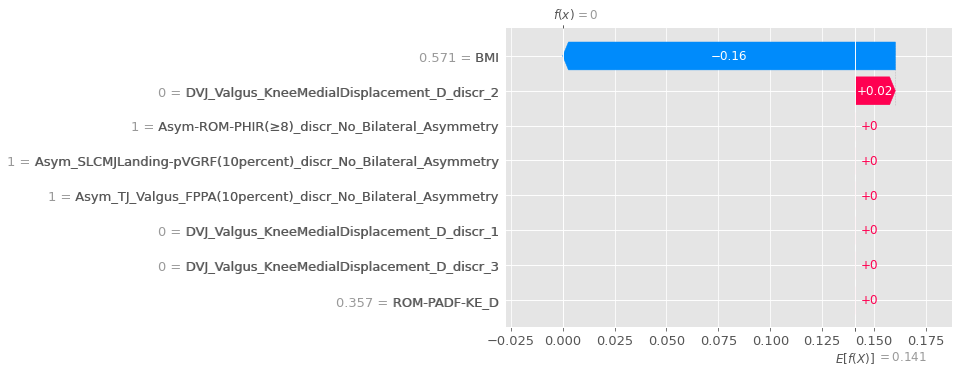

In [152]:
shap.waterfall_plot(ex)

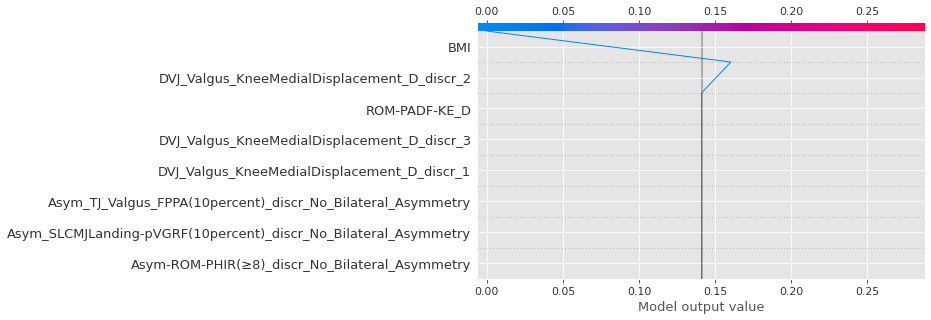

In [153]:
shap.decision_plot(explainer_2_RUS_ROS.expected_value, shap_values_2_RUS_ROS[0], columns)

----------------------------------------------------------------------------
============================= TEST MODEL PYWEKA ===============================
----------------------------------------------------------------------------



Correctly Classified Instances          59               75.641  %
Incorrectly Classified Instances        19               24.359  %
Kappa statistic                          0.0974
Mean absolute error                      0.3353
Root mean squared error                  0.3926
Relative absolute error                111.8953 %
Root relative squared error            102.2761 %
Total Number of Instances               78     

----------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,875    0,786    0,836      0,875    0,855      0,098    0,751     0,929     0
                 0,214   

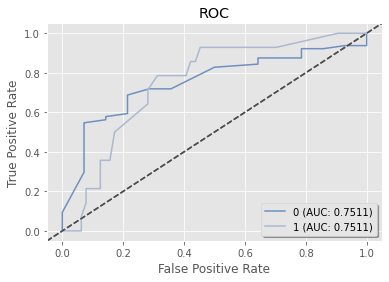

----------------------------------------------------------------------------


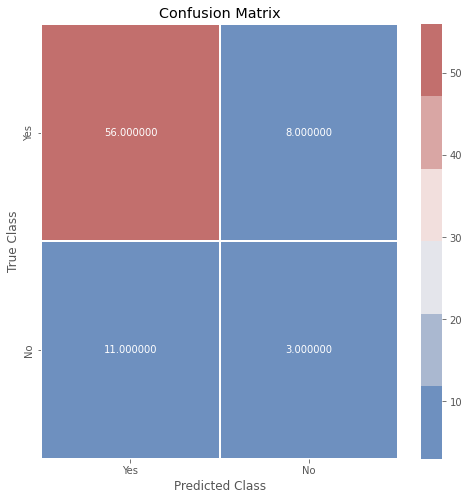

In [154]:
print("----------------------------------------------------------------------------")
print("============================= TEST MODEL PYWEKA ===============================")
print("----------------------------------------------------------------------------")
print("")

evl_model_2_RUS_ROS = Evaluation(data_modelos_1_2_arff_encoded_test)
evl_model_2_RUS_ROS.test_model(Model_2_RUS_ROS, data_modelos_1_2_arff_encoded_test)
print("")

print(evl_model_2_RUS_ROS.summary())
print("----------------------------------------------------------------------------")
print(evl_model_2_RUS_ROS.class_details())
print("----------------------------------------------------------------------------")
plcls.plot_roc(evl_model_2_RUS_ROS, class_index=[0, 1], wait=True)
print("----------------------------------------------------------------------------")
conf_matrix_2_RUS_ROS = evl_model_2_RUS_ROS.confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix_2_RUS_ROS, xticklabels = ["Yes","No"], 
            yticklabels = ["Yes","No"], annot = True, 
            cmap = sns.color_palette("vlag"), fmt = "f", 
            linewidth = 2)

plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [155]:
evaluate_models(sci_Model_2_RUS_ROS, X_test.to_numpy(), label_encoder.fit_transform(y_test), 0)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E ""weka.attributeSelection.CfsSubsetEval -P 1 -E 1"" -S ""weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1"" -W weka.classifiers.meta.MultiSearch -- -E FM -search ""weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.544643,0.544643,0.554274,0.547481,0.54776


In [156]:
evaluate_models(sci_Model_2_RUS_ROS, X_test.to_numpy(), label_encoder.fit_transform(y_test), 1)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0]


,roc_auc_score,recall_score,precision_score,f1_score,mean
"weka_classifier(classifier=FilteredClassifier using weka.classifiers.meta.AttributeSelectedClassifier -E ""weka.attributeSelection.CfsSubsetEval -P 1 -E 1"" -S ""weka.attributeSelection.GreedyStepwise -B -T -1.7976931348623157E308 -N -1 -num-slots 1"" -W weka.classifiers.meta.MultiSearch -- -E FM -search ""weka.core.setupgenerator.MathParameter -property numIterations -min 5.0 -max...\n1,1,1,0,0,0,0.491992,0.642857,0\n1,1,1,0,0,1,0.28823,0.5,0\n1,1,1,1,0,0,0.373821,0.357143,0\n1,0,1,1,0,0,0.132362,0.214286,0\n1,0,1,0,0,0,0.444517,0.214286,0\n1,1,1,0,0,0,0.59028,0.071429,0\n1,0,1,1,0,0,0.386125,0.571429,1\n1,1,1,1,0,0,0.662717,0.464286,1\n1,0,1,0,0,1,0.413098,0.357143,0\n1,0,1,0,0,0,0.357405,0.357143,0\n1,1,1,1,0,0,0.702233,0.357143,1\n1,1,1,1,0,0,0.39637,0.428571,0)",0.544643,0.544643,0.554274,0.547481,0.54776


In [157]:
jvm.stop()